In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy import stats

from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [5]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [11]:
# Selected recipes
s1 = pd.read_csv("./Pro_1/selectedrecipes.csv")
s2 = pd.read_csv("./Pro_2/selectedrecipes.csv")
s3 = pd.read_csv("./Pro_3/selectedrecipes.csv")

In [12]:
s1.rename(columns={'who_score_x': 'who_score', 'fsa_score_x': 'fsa_score'}, inplace=True)
s2.rename(columns={'who_score_x': 'who_score', 'fsa_score_x': 'fsa_score'}, inplace=True)
s3.rename(columns={'who_score_x': 'who_score', 'fsa_score_x': 'fsa_score'}, inplace=True)

In [13]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               707 non-null    int64  
 1   Unnamed: 0_x             707 non-null    int64  
 2   user_id                  707 non-null    int64  
 3   recipe_id                707 non-null    object 
 4   load_more                433 non-null    object 
 5   recipe_order             707 non-null    object 
 6   choice_num               707 non-null    int64  
 7   condition                707 non-null    int64  
 8   submitted_at             707 non-null    object 
 9   query_term               707 non-null    object 
 10  choice_sat_q1            707 non-null    int64  
 11  choice_sat_q4            707 non-null    int64  
 12  choice_sat_q2            707 non-null    int64  
 13  choice_sat_q3            707 non-null    int64  
 14  choice_sat_q5            7

In [8]:
recipes = pd.read_csv("recipes_correct_fsa.csv")

In [9]:
# Add all data to one DF
ms = pd.concat([s1, s2, s3])

In [749]:
# Calculate mean FSA score for each condition
s1_fsa = s1["fsa_score"].mean()
s2_fsa = s2["fsa_score"].mean()
s3_fsa = s3["fsa_score"].mean()
s1_fsa = s1['fsa_score'].to_numpy()
s2_fsa = s2['fsa_score'].to_numpy()
s3_fsa = s3['fsa_score'].to_numpy()

In [750]:
# Ranking FSA
v1_rank = ms.loc[ms['variant'] == 1]
v2_rank = ms.loc[ms['variant'] == 2]
v3_rank = ms.loc[ms['variant'] == 3]

v1_rank_mean = v1_rank["fsa_score"].to_numpy()
v2_rank_mean = v2_rank["fsa_score"].to_numpy()
v3_rank_mean = v3_rank["fsa_score"].to_numpy()


In [751]:
# Get data for each within-subjects variable
# Condition 1 variants

shown1 = s1
shown2 = s2
shown3 = s3 

s1v1 = shown1.loc[shown1['variant'] == 1]
s1v2 = shown1.loc[shown1['variant'] == 2]
s1v3 = shown1.loc[shown1['variant'] == 3]

# Condition 2 variants
s2v1 = shown2.loc[shown2['variant'] == 1]
s2v2 = shown2.loc[shown2['variant'] == 2]
s2v3 = shown2.loc[shown2['variant'] == 3]

# Condition 3 variants
s3v1 = shown3.loc[shown3['variant'] == 1]
s3v2 = shown3.loc[shown3['variant'] == 2]
s3v3 = shown3.loc[shown3['variant'] == 3]

# Get FSA score for different within-subjects variable
s1v1_fsa = s1v1['fsa_score'].to_numpy()
s1v2_fsa = s1v2['fsa_score'].to_numpy()
s1v3_fsa = s1v3['fsa_score'].to_numpy()

s2v1_fsa = s2v1['fsa_score'].to_numpy()
s2v2_fsa = s2v2['fsa_score'].to_numpy()
s2v3_fsa = s2v3['fsa_score'].to_numpy()

s3v1_fsa = s3v1['fsa_score'].to_numpy()
s3v2_fsa = s3v2['fsa_score'].to_numpy()
s3v3_fsa = s3v3['fsa_score'].to_numpy()


# Get Nutriscore  for different within-subjects variable
s1v1_ns = s1v1['nutri_score'].to_numpy()
s1v2_ns = s1v2['nutri_score'].to_numpy()
s1v3_ns = s1v3['nutri_score'].to_numpy()

s1v1_ns = s1v1['nutri_score'].to_numpy()
s1v2_ns = s1v2['nutri_score'].to_numpy()
s1v3_ns = s1v3['nutri_score'].to_numpy()

s1v1_ns = s1v1['nutri_score'].to_numpy()
s1v2_ns = s1v2['nutri_score'].to_numpy()
s1v3_ns = s1v3['nutri_score'].to_numpy()

In [752]:
# Get FSA score for different within-subjects variable EXCLUDE PARTICIPANTS WITH DIETARY RESTRICTIONS
no_res_id = md['user_id'].loc[md['restrictions'] == "none"].values

s1_no_res = s1[s1['user_id'].isin(no_res_id)]
s2_no_res = s2[s2['user_id'].isin(no_res_id)]
s3_no_res = s3[s3['user_id'].isin(no_res_id)]

s1_fsa_no_res = s1_no_res['fsa_score'].to_numpy()
s2_fsa_no_res = s2_no_res['fsa_score'].to_numpy()
s3_fsa_no_res = s3_no_res['fsa_score'].to_numpy()

s1v1_no_res = s1_no_res.loc[s1_no_res['variant'] == 1]
s1v2_no_res = s1_no_res.loc[s1_no_res['variant'] == 2]
s1v3_no_res = s1_no_res.loc[s1_no_res['variant'] == 3]

# Condition 2 variants
s2v1_no_res = s2_no_res.loc[s2_no_res['variant'] == 1]
s2v2_no_res = s2_no_res.loc[s2_no_res['variant'] == 2]
s2v3_no_res = s2_no_res.loc[s2_no_res['variant'] == 3]

# Condition 3 variants
s3v1_no_res = s3_no_res.loc[s3_no_res['variant'] == 1]
s3v2_no_res = s3_no_res.loc[s3_no_res['variant'] == 2]
s3v3_no_res = s3_no_res.loc[s3_no_res['variant'] == 3]

s1v1_fsa_no_res = s1v1_no_res['fsa_score'].to_numpy()
s1v2_fsa_no_res = s1v2_no_res['fsa_score'].to_numpy()
s1v3_fsa_no_res = s1v3_no_res['fsa_score'].to_numpy()

s2v1_fsa_no_res = s2v1_no_res['fsa_score'].to_numpy()
s2v2_fsa_no_res = s2v2_no_res['fsa_score'].to_numpy()
s2v3_fsa_no_res = s2v3_no_res['fsa_score'].to_numpy()

s3v1_fsa_no_res = s3v1_no_res['fsa_score'].to_numpy()
s3v2_fsa_no_res = s3v2_no_res['fsa_score'].to_numpy()
s3v3_fsa_no_res = s3v3_no_res['fsa_score'].to_numpy()

In [753]:
# Get FSA score for different within-subjects variable EXCLUDE VEGANS
no_veg_id = md['user_id'].loc[md['restrictions'] != "vegan"].values

s1_no_veg = s1[s1['user_id'].isin(no_veg_id)]
s2_no_veg = s2[s2['user_id'].isin(no_veg_id)]
s3_no_veg = s3[s3['user_id'].isin(no_veg_id)]

s1v1_no_veg = s1_no_veg.loc[s1_no_veg['variant'] == 1]
s1v2_no_veg = s1_no_veg.loc[s1_no_veg['variant'] == 2]
s1v3_no_veg = s1_no_veg.loc[s1_no_veg['variant'] == 3]

s1_fsa_no_veg = s1_no_veg['fsa_score'].to_numpy()
s2_fsa_no_veg = s2_no_veg['fsa_score'].to_numpy()
s3_fsa_no_veg = s3_no_veg['fsa_score'].to_numpy()

# Condition 2 variants
s2v1_no_veg = s2_no_veg.loc[s2_no_veg['variant'] == 1]
s2v2_no_veg = s2_no_veg.loc[s2_no_veg['variant'] == 2]
s2v3_no_veg = s2_no_veg.loc[s2_no_veg['variant'] == 3]

# Condition 3 variants
s3v1_no_veg = s3_no_veg.loc[s3_no_veg['variant'] == 1]
s3v2_no_veg = s3_no_veg.loc[s3_no_veg['variant'] == 2]
s3v3_no_veg = s3_no_veg.loc[s3_no_veg['variant'] == 3]

s1v1_fsa_no_veg = s1v1_no_veg['fsa_score'].to_numpy()
s1v2_fsa_no_veg = s1v2_no_veg['fsa_score'].to_numpy()
s1v3_fsa_no_veg = s1v3_no_veg['fsa_score'].to_numpy()

s2v1_fsa_no_veg = s2v1_no_veg['fsa_score'].to_numpy()
s2v2_fsa_no_veg = s2v2_no_veg['fsa_score'].to_numpy()
s2v3_fsa_no_veg = s2v3_no_veg['fsa_score'].to_numpy()

s3v1_fsa_no_veg = s3v1_no_veg['fsa_score'].to_numpy()
s3v2_fsa_no_veg = s3v2_no_veg['fsa_score'].to_numpy()
s3v3_fsa_no_veg = s3v3_no_veg['fsa_score'].to_numpy()

In [754]:
# Get FSA score for different within-subjects variable EXCLUDE ALLERGIES
no_allerg_id = md['user_id'].loc[md['restrictions'] != "allergies"].values

s1_no_allerg = s1[s1['user_id'].isin(no_allerg_id)]
s2_no_allerg = s2[s2['user_id'].isin(no_allerg_id)]
s3_no_allerg = s3[s3['user_id'].isin(no_allerg_id)]

s1v1_no_allerg = s1_no_allerg.loc[s1_no_allerg['variant'] == 1]
s1v2_no_allerg = s1_no_allerg.loc[s1_no_allerg['variant'] == 2]
s1v3_no_allerg = s1_no_allerg.loc[s1_no_allerg['variant'] == 3]

s1_fsa_no_allerg = s1_no_allerg['fsa_score'].to_numpy()
s2_fsa_no_allerg = s2_no_allerg['fsa_score'].to_numpy()
s3_fsa_no_allerg = s3_no_allerg['fsa_score'].to_numpy()

# Condition 2 variants
s2v1_no_allerg = s2_no_allerg.loc[s2_no_allerg['variant'] == 1]
s2v2_no_allerg = s2_no_allerg.loc[s2_no_allerg['variant'] == 2]
s2v3_no_allerg = s2_no_allerg.loc[s2_no_allerg['variant'] == 3]

# Condition 3 variants
s3v1_no_allerg = s3_no_allerg.loc[s3_no_allerg['variant'] == 1]
s3v2_no_allerg = s3_no_allerg.loc[s3_no_allerg['variant'] == 2]
s3v3_no_allerg = s3_no_allerg.loc[s3_no_allerg['variant'] == 3]

s1v1_fsa_no_allerg = s1v1_no_allerg['fsa_score'].to_numpy()
s1v2_fsa_no_allerg = s1v2_no_allerg['fsa_score'].to_numpy()
s1v3_fsa_no_allerg = s1v3_no_allerg['fsa_score'].to_numpy()

s2v1_fsa_no_allerg = s2v1_no_allerg['fsa_score'].to_numpy()
s2v2_fsa_no_allerg = s2v2_no_allerg['fsa_score'].to_numpy()
s2v3_fsa_no_allerg = s2v3_no_allerg['fsa_score'].to_numpy()

s3v1_fsa_no_allerg = s3v1_no_allerg['fsa_score'].to_numpy()
s3v2_fsa_no_allerg = s3v2_no_allerg['fsa_score'].to_numpy()
s3v3_fsa_no_allerg = s3v3_no_allerg['fsa_score'].to_numpy()

In [903]:
# Plot mean FSA distibution
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

# RQ1: To what extent can front-of-pack nutrition labels be used to nudge users towards healthier recipes online? 
Summary of findings: 
1. Labels work 
2. MTL is the superior label as compared to Nutriscore in Popular, Health and Random ranking scenarios. 
3. No significant difference when comparing Americans and Europeans with regards to different variants

# Two-way ANOVA
To examine RQ1, a two-way repeated measures ANOVA was conducted to compare the influence of labels and ranking on the healthiness of recipes chosen across three different trials.


In [908]:
anova_df = ms[['user_id', 'fsa_score', 'variant', 'condition']]
anova_df

# Create a new column with names for each label
def label_name (row):
    if row['condition'] == 1 :
        return 'Nutriscore'
    if row['condition'] == 2 :
        return 'MTL'
    if row['condition'] == 3 :
        return 'No-label'

def rank_name (row):
    if row['variant'] == 1 :
        return 'Popular'
    if row['variant'] == 2 :
        return 'Random'
    if row['variant'] == 3 :
        return 'Health'

anova_df['Label'] = anova_df.apply (lambda row: label_name(row), axis=1)
anova_df['Rank'] = anova_df.apply (lambda row: rank_name(row), axis=1)

In [912]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA

# Condition = Label
# Variant = Ranking
model = ols('fsa_score ~ C(Label, Treatment(reference="No-label")) + C(Rank, Treatment(reference="Random")) + C(Label):C(Rank)', data=anova_df).fit()
sm = sm.stats.anova_lm(model, typ=2)
sm
#print(model.summary())
#print(model.summary(xname=['Fred', 'Mary', 'Ethel', 'Bob', 'Fred', 'Mary', 'Ethel', 'Bob', "jj"]))

,sum_sq,df,F,PR(>F)
"C(Label, Treatment(reference=""No-label""))",665.768816,2.0,178.212781,2.908774e-72
"C(Rank, Treatment(reference=""Random""))",2836.912342,2.0,759.383778,2.143503e-249
C(Label):C(Rank),12619.521355,8.0,844.497349,0.000000e+00
Residual,3958.089062,2119.0,NaN,NaN


In [916]:
model = ols('fsa_score ~ C(Label) + C(Rank) + C(Label):C(Rank)', data=anova_df).fit()
sm.stats.anova_lm(model, typ=2)


AttributeError: 'DataFrame' object has no attribute 'stats'

In [889]:
aov = pg.mixed_anova(dv='fsa_score',
                  within='Rank',
                  between='Label',
                  subject='user_id', data=anova_df)
aov

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Label,31.547183,2,710,15.773592,7.927632,0.000394,0.021844,NaN
1,Rank,5.832846,2,1420,2.916423,1.626980,0.196888,0.002286,0.997709
2,Interaction,1.662018,4,1420,0.415505,0.231797,0.920577,0.000653,NaN


In [890]:
# Balance data (remove where user_id only selected 2 recipes)
anova_df = anova_df[anova_df['user_id'].map(anova_df['user_id'].value_counts()) > 2]

pg.pairwise_ttests(data=anova_df, dv='fsa_score', between='Label', within='Rank', subject='user_id')

,Contrast,Rank,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Rank,-,Health,Popular,True,True,1.396878,691.000000,two-sided,0.162899,0.113,0.074162
1,Rank,-,Health,Random,True,True,1.616148,691.000000,two-sided,0.106519,0.157,0.084674
2,Rank,-,Popular,Random,True,True,0.174479,691.000000,two-sided,0.861540,0.043,0.009637
3,Label,-,MTL,No-label,False,True,-3.980833,457.913022,two-sided,0.000080,202.062,-0.370242
4,Label,-,MTL,Nutriscore,False,True,-1.243363,460.000000,two-sided,0.214368,0.218,-0.115504
5,Label,-,No-label,Nutriscore,False,True,2.760338,458.055782,two-sided,0.006006,4.061,0.256727
6,Rank * Label,Health,MTL,No-label,False,True,-2.363636,458.255864,two-sided,0.018513,1.533,-0.219790
7,Rank * Label,Health,MTL,Nutriscore,False,True,-0.329935,460.000000,two-sided,0.741599,0.109,-0.030650
8,Rank * Label,Health,No-label,Nutriscore,False,True,2.047134,458.743915,two-sided,0.041214,0.783,0.190366
9,Rank * Label,Popular,MTL,No-label,False,True,-2.533285,452.936296,two-sided,0.011636,2.283,-0.235646


In [826]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              fsa_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.613
Date:                Tue, 27 Apr 2021   Prob (F-statistic):            0.00762
Time:                        12:30:04   Log-Likelihood:                -3679.8
No. Observations:                2128   AIC:                             7378.
Df Residuals:                    2119   BIC:                             7429.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [827]:
# estimate the p-values
model.pvalues

Intercept                                                   0.000000e+00
C(Label, Treatment(reference="No-label"))[T.MTL]            3.396930e-36
C(Label, Treatment(reference="No-label"))[T.Nutriscore]     2.072140e-44
C(Rank, Treatment(reference="Random"))[T.Health]           2.804405e-121
C(Rank, Treatment(reference="Random"))[T.Popular]           1.510375e-74
C(Rank)[T.Popular]                                          1.510375e-74
C(Rank)[T.Random]                                          4.837386e-104
C(Label)[T.No-label]:C(Rank)[Health]                        2.835863e-19
C(Label)[T.Nutriscore]:C(Rank)[Health]                      1.518104e-01
C(Label)[T.No-label]:C(Rank)[Popular]                       2.124546e-19
C(Label)[T.Nutriscore]:C(Rank)[Popular]                     1.025919e-01
C(Label)[T.No-label]:C(Rank)[Random]                        6.438016e-18
C(Label)[T.Nutriscore]:C(Rank)[Random]                      1.357953e-02
dtype: float64

In [829]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA

# Condition = Label
# Variant = Ranking
model = ols('fsa_score ~ C(Label) + C(Rank) + C(Label):C(Rank)', data=anova_df).fit()
sm = sm.stats.anova_lm(model, typ=3)
print(sm)
print(model.summary())
#print(model.summary(xname=['Fred', 'Mary', 'Ethel', 'Bob', 'Fred', 'Mary', 'Ethel', 'Bob', "jj"]))

                       sum_sq      df            F    PR(>F)
Intercept         9799.898734     1.0  5246.467448  0.000000
C(Label)            11.710180     2.0     3.134577  0.043720
C(Rank)              2.720113     2.0     0.728119  0.482937
C(Label):C(Rank)     1.693526     4.0     0.226661  0.923572
Residual          3958.089062  2119.0          NaN       NaN
                            OLS Regression Results                            
Dep. Variable:              fsa_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.613
Date:                Tue, 27 Apr 2021   Prob (F-statistic):            0.00762
Time:                        12:38:08   Log-Likelihood:                -3679.8
No. Observations:                2128   AIC:                             7378.
Df Residuals:                    2119   BIC:                             7429.
Df


* Since the p-values for label is less than .05, this means that label have a statistically significant effect on FSA score. The p-value for ranking is greater than .05, and ranking does not have a statistically significant effect on FSA score. 

* And since the p-value for the interaction effect (.923572) is not less than .05, this tells us that there is no significant interaction effect between label and ranking. 

## Describe data

### Condition 1 FSA

In [925]:
print("Nutriscore:", stats.describe(s1_fsa), "\n")
print("MTL:", stats.describe(s2_fsa), "\n")
print("No-label:", stats.describe(s3_fsa), "\n")

Nutriscore: DescribeResult(nobs=709, minmax=(4, 10), mean=6.455571227080395, variance=1.8754950475325316, skewness=0.3671443279486478, kurtosis=-0.5185018012557832) 

MTL: DescribeResult(nobs=711, minmax=(4, 10), mean=6.344585091420535, variance=1.8092628909886885, skewness=0.35674269473784875, kurtosis=-0.4859481199041844) 

No-label: DescribeResult(nobs=708, minmax=(4, 10), mean=6.639830508474576, variance=1.9139416968331213, skewness=0.19467328727118807, kurtosis=-0.673602518333642) 



In [492]:
stats.describe(s2_fsa)

DescribeResult(nobs=711, minmax=(4, 10), mean=6.344585091420535, variance=1.8092628909886885, skewness=0.35674269473784875, kurtosis=-0.4859481199041844)

In [493]:
stats.describe(s3_fsa)

DescribeResult(nobs=708, minmax=(4, 10), mean=6.639830508474576, variance=1.9139416968331213, skewness=0.19467328727118807, kurtosis=-0.673602518333642)

### Nutriscore FSA for different variants (Popular, random, health)

In [495]:
stats.describe(s1v1_fsa)

DescribeResult(nobs=236, minmax=(4, 10), mean=6.398305084745763, variance=1.9087630724846731, skewness=0.5903834999525028, kurtosis=-0.25604072037938197)

In [498]:
stats.describe(s1v2_fsa)

DescribeResult(nobs=239, minmax=(4, 10), mean=6.451882845188284, variance=1.7193136668893498, skewness=0.2674876825379554, kurtosis=-0.5680382463574736)

In [499]:
stats.describe(s1v3_fsa)

DescribeResult(nobs=244, minmax=(4, 10), mean=6.483606557377049, variance=1.9873844700802805, skewness=0.2586799768438279, kurtosis=-0.6638461659869201)

### MTL FSA for different variants (Popular, random, health)

In [501]:
stats.describe(s2v1_fsa)

DescribeResult(nobs=241, minmax=(4, 10), mean=6.327800829875518, variance=1.6295988934993086, skewness=0.4534031095030632, kurtosis=-0.22408674821556795)

In [503]:
stats.describe(s2v2_fsa)

DescribeResult(nobs=242, minmax=(4, 10), mean=6.293388429752066, variance=1.801532869243167, skewness=0.32112497492850983, kurtosis=-0.5533146498315538)

In [502]:
stats.describe(s2v3_fsa)

DescribeResult(nobs=244, minmax=(4, 10), mean=6.418032786885246, variance=1.9809080483033124, skewness=0.2610586188287066, kurtosis=-0.6699139915866557)

### No-label FSA for different variants (Popular, random, health)

In [506]:
stats.describe(s3v1_fsa)

DescribeResult(nobs=237, minmax=(4, 10), mean=6.637130801687764, variance=2.0711578345133375, skewness=0.2584584384867445, kurtosis=-0.8007448935984973)

In [505]:
stats.describe(s3v2_fsa)

DescribeResult(nobs=236, minmax=(4, 10), mean=6.555084745762712, variance=1.7969527587450411, skewness=0.19017789636331284, kurtosis=-0.5153950336646007)

In [504]:
stats.describe(s3v3_fsa)

DescribeResult(nobs=239, minmax=(4, 10), mean=6.7322175732217575, variance=1.8607643894377843, skewness=0.1133981845230343, kurtosis=-0.6828856892853268)

## FSA score distibution

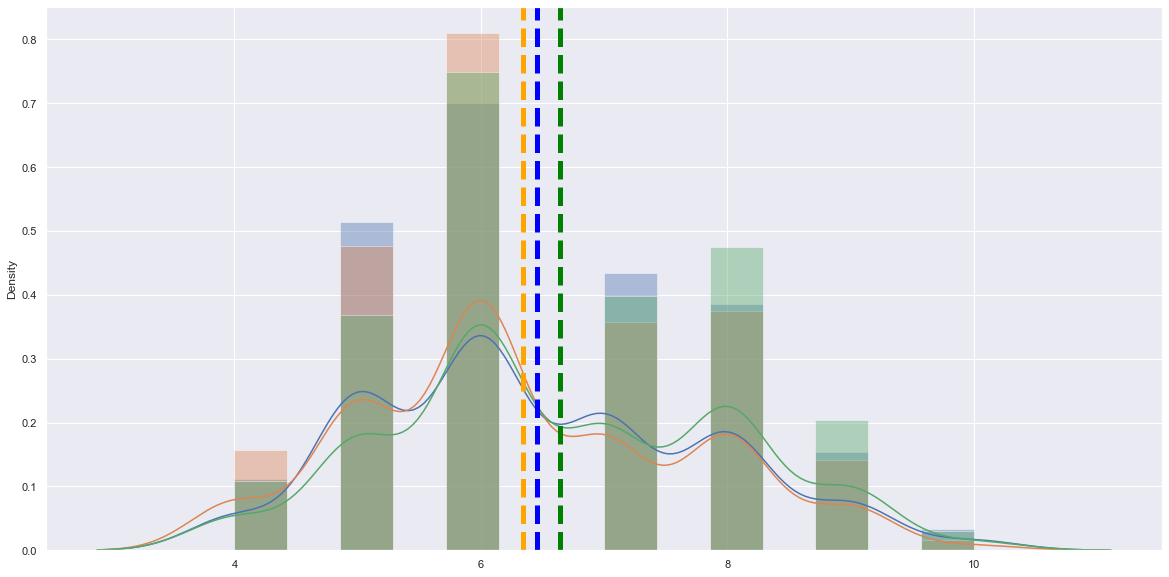

In [513]:
# Compare all conditions
plt.figure()
ax1 = sns.distplot(s1_fsa)
ax2 = sns.distplot(s2_fsa)
ax3 = sns.distplot(s3_fsa)
plt.axvline(np.mean(s1_fsa), color='blue', linestyle='dashed', linewidth=5)    # Nutri-score
plt.axvline(np.mean(s2_fsa), color='orange', linestyle='dashed', linewidth=5)  # MTL
plt.axvline(np.mean(s3_fsa), color='green', linestyle='dashed', linewidth=5)   # No-label

* In the MTL condition participants choose the healthiest recipes overall 
* As expected participants in the No-label condition choose the least healthy recipes

# Compare FSA between conditions (between subjects variable = Label)
* Compare the means between groups and determine whether any of those means are statistically significantly different from each other.
* FSA score = dependent variable

In [896]:
# ANOVA
f_oneway(s1_fsa, s2_fsa, s3_fsa)

F_onewayResult(statistic=8.45244551039327, pvalue=0.00022063470737275636)

In [902]:
# Run the ANOVA
import pingouin as pg

aov = pg.anova(data=ms, dv='fsa_score', between='condition', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,condition,31.547183,2,15.773592,8.452446,0.000221,0.007892
1,Within,3965.583926,2125,1.866157,NaN,NaN,NaN


In [416]:
# Same as above but exclude vegans
f_oneway(s1_fsa_no_veg, s2_fsa_no_veg, s3_fsa_no_veg)

F_onewayResult(statistic=7.977573001172848, pvalue=0.0003541373746782644)

In [419]:
# Same as above but exclude allergies
f_oneway(s1_fsa_no_allerg, s2_fsa_no_allerg, s3_fsa_no_allerg)

F_onewayResult(statistic=8.283978746109065, pvalue=0.0002607167808299456)

* There is a statistically significantly difference in the mean FSA score between the different between subjects variables (labels)

## Compare the specific between subjects variables using T-tests (Nutriscore, MTL, No-label)

### Nutriscore - MTL

In [26]:
stats.ttest_ind(s1_fsa, s2_fsa)

Ttest_indResult(statistic=1.3814282781137508, pvalue=0.1673610243954001)

In [421]:
# Same as above but exclude allergies 
stats.ttest_ind(s1_fsa_no_allerg, s2_fsa_no_allerg)

Ttest_indResult(statistic=1.3319912649967725, pvalue=0.1830745668157754)

In [422]:
# Same as above but exclude vegans
stats.ttest_ind(s1_fsa_no_veg, s2_fsa_no_veg)

Ttest_indResult(statistic=1.3047090655284854, pvalue=0.19221952086941382)

* There is no statistically significantly difference in the dependent variable (FSA score) between Nutriscore and MTL 
* We expected the MTL label to perform better for people with higher food knowledge/trying to avoid certain nutrients
* We expected Nutriscore to perform better for people with lower food knowledge, because it makes it easier to determine the healthiness of a recipe without any prior knowledge of spcefic nutrients. 

###  Nutriscore - No label


In [27]:
stats.ttest_ind(s1_fsa, s3_fsa)

Ttest_indResult(statistic=-2.7082263589271407, pvalue=0.0068450937847506655)

In [423]:
# Same as above but exclude allergies 
stats.ttest_ind(s1_fsa_no_allerg, s3_fsa_no_allerg)

Ttest_indResult(statistic=-2.6516625752904215, pvalue=0.008098990809798813)

In [424]:
# Same as above but exclude vegans
stats.ttest_ind(s1_fsa_no_veg, s3_fsa_no_veg)

Ttest_indResult(statistic=-2.5497390265036204, pvalue=0.010893018418846977)

* As expected there is a statistically significantly difference in the dependent variable FSA score between Nutriscore and No-label. 

###  MTL - No label

In [427]:
stats.ttest_ind(s2_fsa, s3_fsa)

Ttest_indResult(statistic=-4.110555088579151, pvalue=4.170307723970711e-05)

In [425]:
# Same as above but exclude allergies 
stats.ttest_ind(s2_fsa_no_allerg, s3_fsa_no_allerg)

Ttest_indResult(statistic=-4.004024415714614, pvalue=6.547538649877777e-05)

In [426]:
# Same as above but exclude vegans
stats.ttest_ind(s2_fsa_no_veg, s3_fsa_no_veg)

Ttest_indResult(statistic=-3.9372440708010745, pvalue=8.66145378054762e-05)

* As expected there is a statistically significantly difference in the dependent variable FSA score between Nutriscore and No-label. 
* The difference is greater than between Nutriscore and No-label, indicating that MTL is the superior label. Taking a closer look at this in cell XX. 

# Compare the within-subjects variable "Ranking" between conditions using T-tests (Popular, Random, Health)
* Compare the different rankings to see if there are any significant differences in ranking overall

In [29]:
f_oneway(v1_rank_mean, v2_rank_mean, v3_rank_mean)

F_onewayResult(statistic=1.3383591509371504, pvalue=0.26249358040295084)

In [926]:
# Popular rank - Random rank
stats.ttest_ind(v1_rank_mean, v2_rank_mean)

Ttest_indResult(statistic=0.28555592883713743, pvalue=0.7752601149584006)

In [31]:
# Popular rank - Health rank
stats.ttest_ind(v1_rank_mean, v3_rank_mean)

Ttest_indResult(statistic=-1.2268893370030742, pvalue=0.22006488037094113)

In [515]:
# Health - Random rank
stats.ttest_ind(v3_rank_mean, v2_rank_mean)

Ttest_indResult(statistic=1.5424486363966807, pvalue=0.12318401962991636)

In [ ]:
f_oneway(s1_fsa, s2_fsa, s3_fsa)

* No significant difference in FSA score when looking only at the ranking. 
* Need to look at ranking in combination with labels -->

# Compare FSA between conditions for specific within-subjects variables (ranking - Popular/Random/Health)

## Variant 1: Popular ranking compare between conditions

In [34]:
f_oneway(s1v1_fsa, s2v1_fsa, s3v1_fsa)

F_onewayResult(statistic=3.3499944413384086, pvalue=0.035639209734317875)

In [428]:
# Same as above but exclude allergies 
f_oneway(s1v1_fsa_no_allerg, s2v1_fsa_no_allerg, s3v1_fsa_no_allerg)

F_onewayResult(statistic=3.228176521486356, pvalue=0.0402154068504066)

In [429]:
# Same as above but exclude allergies 
f_oneway(s1v1_fsa_no_veg, s2v1_fsa_no_veg, s3v1_fsa_no_veg)

F_onewayResult(statistic=2.8999723876708923, pvalue=0.055728360973759876)

In [522]:
print(stats.describe(s1v1_fsa))
print(stats.describe(s2v1_fsa))
print(stats.describe(s3v1_fsa))

DescribeResult(nobs=236, minmax=(4, 10), mean=6.398305084745763, variance=1.9087630724846731, skewness=0.5903834999525028, kurtosis=-0.25604072037938197)
DescribeResult(nobs=241, minmax=(4, 10), mean=6.327800829875518, variance=1.6295988934993086, skewness=0.4534031095030632, kurtosis=-0.22408674821556795)
DescribeResult(nobs=237, minmax=(4, 10), mean=6.637130801687764, variance=2.0711578345133375, skewness=0.2584584384867445, kurtosis=-0.8007448935984973)


* There is a significant difference in FSA score between the different conditions when looking at the within-subjects variable "Popular ranking".
* Participants in the No-label condition choose less healthier recipes. 
* Participants in the MTL condition choose the healthiest recipes.
* This indicates that adding a health label might be beneficial since a lot of recipe sites rank recipes by popularity. 
* **Should also look at if the most popular recipes are healther than the less popular recipes**

In [ ]:
# get recipe dataset
# sort by popularity 
# Check if top n recipes have higher FSA score than bottom n

### Cond 1 - Cond 2 popular ranking FSA

In [35]:
stats.ttest_ind(s1v1_fsa, s2v1_fsa)

Ttest_indResult(statistic=0.57904850194586, pvalue=0.5628309312520248)

In [430]:
# Same as above but exclude allergies 
stats.ttest_ind(s1v1_fsa_no_allerg, s2v1_fsa_no_allerg)

Ttest_indResult(statistic=0.491346377062891, pvalue=0.6234098749015834)

In [431]:
# Same as above but exclude allergies 
stats.ttest_ind(s1v1_fsa_no_veg, s2v1_fsa_no_veg)

Ttest_indResult(statistic=1.091583464113852, pvalue=0.2756218385065663)

* As expected there is no significant difference between MTL and Nutriscore with popular ranking.

### Cond 1 - Cond 3 popular ranking FSA

In [36]:
stats.ttest_ind(s1v1_fsa, s3v1_fsa)

Ttest_indResult(statistic=-1.840940111013845, pvalue=0.06625909878446001)

In [432]:
# Same as above but exclude allergies 
stats.ttest_ind(s1v1_fsa_no_allerg, s3v1_fsa_no_allerg)

Ttest_indResult(statistic=-1.8579619519434631, pvalue=0.06380353227552085)

In [433]:
# Same as above but exclude allergies 
stats.ttest_ind(s1v1_fsa_no_veg, s3v1_fsa_no_veg)

Ttest_indResult(statistic=-1.2560380228291081, pvalue=0.20977946639358183)

* There is a difference between Nutriscore and No-label, but it is not statistically significant. 

### Cond 2 - Cond 3 popular ranking FSA

In [37]:
stats.ttest_ind(s2v1_fsa, s3v1_fsa)

Ttest_indResult(statistic=-2.487014457744045, pvalue=0.013223546627327845)

In [434]:
# Same as above but exclude allergies 
stats.ttest_ind(s2v1_fsa_no_allerg, s3v1_fsa_no_allerg)

Ttest_indResult(statistic=-2.416268172643868, pvalue=0.016058206858452866)

In [435]:
# Same as above but exclude allergies 
stats.ttest_ind(s2v1_fsa_no_veg, s3v1_fsa_no_veg)

Ttest_indResult(statistic=-2.424097185063065, pvalue=0.015740475297824543)

In [528]:
# FSA score for 
print(stats.describe(s2v1_fsa))
print(stats.describe(s1v1_fsa))

DescribeResult(nobs=241, minmax=(4, 10), mean=6.327800829875518, variance=1.6295988934993086, skewness=0.4534031095030632, kurtosis=-0.22408674821556795)
DescribeResult(nobs=236, minmax=(4, 10), mean=6.398305084745763, variance=1.9087630724846731, skewness=0.5903834999525028, kurtosis=-0.25604072037938197)


* The biggest difference is between MTL and No-label, indicating that MTL is more effective than nutriscore in a popular ranking scenario. 

## Variant 2: Random ranking compare between conditions

### One-way ANOVA

In [927]:
f_oneway(s1v2_fsa, s2v2_fsa, s3v2_fsa)

F_onewayResult(statistic=2.403306519109075, pvalue=0.09115997992995416)

In [439]:
# Same as above but exclude allergies 
f_oneway(s1v2_fsa_no_allerg, s2v2_fsa_no_allerg, s3v2_fsa_no_allerg)

F_onewayResult(statistic=2.374612631106752, pvalue=0.09379020833809346)

In [440]:
# Same as above but exclude vegans
f_oneway(s1v2_fsa_no_veg, s2v2_fsa_no_veg, s3v2_fsa_no_veg)

F_onewayResult(statistic=2.5684150930653478, pvalue=0.07742067189137807)

* No significant difference between conditions in a random ranking scenario. 

### Cond 1 - Cond 2 random ranking FSA

In [41]:
stats.ttest_ind(s1v2_fsa, s2v2_fsa)

Ttest_indResult(statistic=1.3098083448058286, pvalue=0.1908885112613517)

In [441]:
# Same as above but exclude allergies 
stats.ttest_ind(s1v2_fsa_no_allerg, s2v2_fsa_no_allerg)

Ttest_indResult(statistic=1.2209977199865756, pvalue=0.22269132805911082)

In [442]:
# Same as above but exclude vegans
stats.ttest_ind(s1v2_fsa_no_veg, s2v2_fsa_no_veg)

Ttest_indResult(statistic=1.4376305755160013, pvalue=0.15125130143829882)

* No significant difference between Nutriscore and MTL.

### Cond 1 - Cond 3 random ranking FSA

In [42]:
stats.ttest_ind(s1v2_fsa, s3v2_fsa)

Ttest_indResult(statistic=-0.848204095881309, pvalue=0.39675333856851347)

In [443]:
# Same as above but exclude allergies 
stats.ttest_ind(s1v2_fsa_no_allerg, s3v2_fsa_no_allerg)

Ttest_indResult(statistic=-0.9583471693830188, pvalue=0.33838148664392076)

In [444]:
# Same as above but exclude vegans
stats.ttest_ind(s1v2_fsa_no_veg, s3v2_fsa_no_veg)

Ttest_indResult(statistic=-0.769565356386232, pvalue=0.4419754356361365)

* No significant difference between Nutriscore and No-label.
* Would expect the Nutriscore label to make it easier for participants to select healthier recipes in a random ranking scenario. 
* However using nutriscore without ranking might lessen the effect of the nutriscore label. In a health ranking scenario the differences in healthiness becomes more apparent, and seeing the recipes become increasingly more unhealthy might make you more health aware..

### Cond 2 - Cond 3 random ranking FSA

In [43]:
stats.ttest_ind(s2v2_fsa, s3v2_fsa)

Ttest_indResult(statistic=-2.132548774681423, pvalue=0.033472870352432814)

In [445]:
# Same as above but exclude allergies 
stats.ttest_ind(s2v2_fsa_no_allerg, s3v2_fsa_no_allerg)

Ttest_indResult(statistic=-2.1586343975605042, pvalue=0.031380873664829896)

In [446]:
# Same as above but exclude vegans
stats.ttest_ind(s2v2_fsa_no_veg, s3v2_fsa_no_veg)

Ttest_indResult(statistic=-2.226349629737368, pvalue=0.026485141587677116)

* There is a significant difference in FSA score between MTL and No-label in the random ranking scenario. 
* This might be because there is more information to be considered in the MTL label vs. the Nutriscore label?? Maybe there is an advantage in having more information to consider -- Colour + HIGH, MED, LOW + Amount of sugar/fat/satfat/salt? For some reason its easier to ignore the nutriscore in a random ranking scenario, while there is more information in the MTL label making it more natural to consider this information as well

# Variant 3: Health ranking compare between conditions

### One-way ANOVA

In [44]:
f_oneway(s1v3_fsa, s2v3_fsa, s3v3_fsa)

F_onewayResult(statistic=3.403021732601091, pvalue=0.033805693965767346)

In [448]:
# Same as above but exclude allergies 
f_oneway(s1v3_fsa_no_allerg, s2v3_fsa_no_allerg, s3v3_fsa_no_allerg)

F_onewayResult(statistic=2.9479467806271447, pvalue=0.05308156008695292)

In [449]:
# Same as above but exclude vegans
f_oneway(s1v3_fsa_no_veg, s2v3_fsa_no_veg, s3v3_fsa_no_veg)

F_onewayResult(statistic=3.4048644091097473, pvalue=0.03378877883977377)

* Significant difference between conditions in a health ranking scenario.

### Cond 1 - Cond 2 health ranking FSA

In [45]:
stats.ttest_ind(s1v3_fsa, s2v3_fsa)

Ttest_indResult(statistic=0.514189531362443, pvalue=0.607353206433612)

In [450]:
# Same as above but exclude allergies 
stats.ttest_ind(s1v3_fsa_no_allerg, s2v3_fsa_no_allerg)

Ttest_indResult(statistic=0.5952117644173314, pvalue=0.5519806863742355)

In [451]:
# Same as above but exclude vegans
stats.ttest_ind(s1v3_fsa_no_veg, s2v3_fsa_no_veg)

Ttest_indResult(statistic=-0.21717732038667126, pvalue=0.8281703702830272)

* No significant difference between MTL and nutriscore in a health ranking scenario

### Cond 1 - Cond 3 health ranking FSA

In [46]:
stats.ttest_ind(s1v3_fsa, s3v3_fsa)

Ttest_indResult(statistic=-1.9690442326974582, pvalue=0.049521609522912895)

In [453]:
# Same as above but exclude allergies 
stats.ttest_ind(s1v3_fsa_no_allerg, s3v3_fsa_no_allerg)

Ttest_indResult(statistic=-1.7517970379464076, pvalue=0.0804513312500057)

In [452]:
# Same as above but exclude vegans
stats.ttest_ind(s1v3_fsa_no_veg, s3v3_fsa_no_veg)

Ttest_indResult(statistic=-2.360267656488106, pvalue=0.018694299426139864)

* There is a significant difference between Nutriscore and No-label in the health ranking scenario

### Cond 2 - Cond 3 health ranking FSA

In [47]:
stats.ttest_ind(s2v3_fsa, s3v3_fsa)

Ttest_indResult(statistic=-2.4905180895370953, pvalue=0.013092028967063912)

In [454]:
# Same as above but exclude allergies 
stats.ttest_ind(s2v3_fsa_no_allerg, s3v3_fsa_no_allerg)

Ttest_indResult(statistic=-2.3527889547556136, pvalue=0.019037591151716483)

In [455]:
# Same as above but exclude vegans
stats.ttest_ind(s2v3_fsa_no_veg, s3v3_fsa_no_veg)

Ttest_indResult(statistic=-2.1577403933892896, pvalue=0.031475342345217594)

In [526]:
print(stats.describe(s2v3_fsa))
print(stats.describe(s3v3_fsa))

DescribeResult(nobs=244, minmax=(4, 10), mean=6.418032786885246, variance=1.9809080483033124, skewness=0.2610586188287066, kurtosis=-0.6699139915866557)
DescribeResult(nobs=239, minmax=(4, 10), mean=6.7322175732217575, variance=1.8607643894377843, skewness=0.1133981845230343, kurtosis=-0.6828856892853268)


In [527]:
# FSA scores for participants in No-label condition
print(stats.describe(s3v1_fsa))
print(stats.describe(s3v2_fsa))
print(stats.describe(s3v3_fsa))

DescribeResult(nobs=237, minmax=(4, 10), mean=6.637130801687764, variance=2.0711578345133375, skewness=0.2584584384867445, kurtosis=-0.8007448935984973)
DescribeResult(nobs=236, minmax=(4, 10), mean=6.555084745762712, variance=1.7969527587450411, skewness=0.19017789636331284, kurtosis=-0.5153950336646007)
DescribeResult(nobs=239, minmax=(4, 10), mean=6.7322175732217575, variance=1.8607643894377843, skewness=0.1133981845230343, kurtosis=-0.6828856892853268)


* There is a significant difference between MTL and No-label in the health ranking scenario. 
* The biggest difference is between MTL and No-label, indicating that MTL is more effective than nutriscore in a health ranking scenario.
* Participants in the No-label condition choose the least healthy recipes in the health ranking condition! And the most healthy recipes in the random condition.

# Which label is the best? Nutriscore or MTL? 

* As we have already seen MTL is the superior lable in Health, random and popular ranking
* **We need to look closer at this because in the Health ranking scenario the recipes are ordered slightly different because MTL is ranked by FSA (4-12), while Nutriscore is ranked by the nutriscore (A-E)**

## Problem: Nutriscore and MTL is calulated differently. How to account for this difference when comparing them? 
* Use WHO score

## Comparing MTL and Nutriscroe using WHO health score
* We need to have the same score to compare the two conditions to figure out which label works best (if any)

* A recipe or meal plan with a WHO score of 7 is interpreted as being very healthy whereas a score of 0 is seen as very unhealthy 
* FSA score: range from 4 (very healthy recipe) to 12 (very unhealthy recipe)

In [715]:
# Problem: The health ranking for Nutriscore and MTL is very different. Show top 10 recipes ordered by healthiness: 
rec = recipes[["recipe_name", "fsa_score", "nutri_score", "who_score"]]
rec.sort_values(by=['fsa_score']).head(10)

,recipe_name,fsa_score,nutri_score,who_score
57,Tomato and Garlic Pasta,4,C,4
23,Easy Chicken Rice Casserole,4,A,3
0,Amazing Brown Rice Salad,5,C,2
41,Pasta Chickpea Salad,5,A,6
35,Lemon Pepper Pasta,5,B,6
28,Fruit Salad in Seconds,5,D,3
49,Scrumptious Chicken Vegetable Stew,5,B,5
52,Spinach and Pasta Shells,5,B,6
14,Caribbean Sweet Potato Salad,5,C,2
21,Chickpea and Quinoa Salad with Lemon and Tahini,5,B,5


In [716]:
# Top 10 recipes ordered by Nutriscore: 
rec.sort_values(by=['nutri_score']).head(10)

,recipe_name,fsa_score,nutri_score,who_score
41,Pasta Chickpea Salad,5,A,6
23,Easy Chicken Rice Casserole,4,A,3
22,Chinese Chicken Salad,7,A,1
33,Hawaiian Chicken Salad,7,B,0
21,Chickpea and Quinoa Salad with Lemon and Tahini,5,B,5
52,Spinach and Pasta Shells,5,B,6
47,Restaurant Style Chicken Nachos,7,B,1
35,Lemon Pepper Pasta,5,B,6
49,Scrumptious Chicken Vegetable Stew,5,B,5
38,Onion Pasta,6,C,2


In [718]:
# Get who score for different within-subjects variable
s1v1_who = s1v1['who_score'].to_numpy()
s1v2_who = s1v2['who_score'].to_numpy()
s1v3_who = s1v3['who_score'].to_numpy()

s2v1_who = s2v1['who_score'].to_numpy()
s2v2_who = s2v2['who_score'].to_numpy()
s2v3_who = s2v3['who_score'].to_numpy()

s3v1_who = s3v1['who_score'].to_numpy()
s3v2_who = s3v2['who_score'].to_numpy()
s3v3_who = s3v3['who_score'].to_numpy()

# Turn Nutriscore to numeric ( A=0, E=4)
def label_name (row):
    if row['nutri_score'] == 'A' :
        return 0
    if row['nutri_score'] == 'B' :
        return 1
    if row['nutri_score'] == 'C' :
        return 2
    if row['nutri_score'] == 'D' :
        return 3
    if row['nutri_score'] == 'E' :
        return 4

df['label_name'] = df.apply (lambda row: label_name(row), axis=1)

In [ ]:
# Compare Nutriscore and MTL

In [722]:
# Variant 1: Popular ranking
stats.ttest_ind(s1v1_who, s2v1_who)

Ttest_indResult(statistic=0.0701801072783086, pvalue=0.9440802209980264)

In [928]:
# Variant 2: Random ranking
stats.ttest_ind(s1v2_who, s2v2_who)

Ttest_indResult(statistic=-0.8407823025149365, pvalue=0.4008965298108095)

In [724]:
# Variant 3: Health ranking
stats.ttest_ind(s1v3_who, s2v3_who)

Ttest_indResult(statistic=0.8950367974384613, pvalue=0.37122168596721616)

In [726]:
print(s1v3_who.mean())

2.5439330543933054


In [727]:
print(s2v3_who.mean())

2.409282700421941


* Using WHO score to compare Nutriscore and MTL there are not any significant differences in WHO score between the different conditions. 

# PERSONAL FACTORS
Does personal factors (goals, experience, nationality etc.) influence the results? 

In [ ]:
# Create groups based on demographic questions
demo1 = pd.read_csv("./Pro_1/demographics.csv")
demo2 = pd.read_csv("./Pro_2/demographics.csv")
demo3 = pd.read_csv("./Pro_3/demographics.csv")
md = pd.concat([demo1, demo2, demo3])

# Get USER_ID for participants in different groups

# Education 
e1 = md['user_id'].loc[md['education'] == 1].values
e2 = md['user_id'].loc[md['education'] == 2].values
e3 = md['user_id'].loc[md['education'] == 3].values
e4 = md['user_id'].loc[md['education'] == 4].values
e5 = md['user_id'].loc[md['education'] == 5].values
e6 = md['user_id'].loc[md['education'] == 6].values

# Nationality 
# American vs. europeans
n1 = md['user_id'].loc[md['american'] == "American"].values
n2 = md['user_id'].loc[md['european'] == "European"].values

# Dietary goals
g1 = md['user_id'].loc[md['goal'] == "protein"].values
g2 = md['user_id'].loc[md['goal'] == "salt"].values
g3 = md['user_id'].loc[md['goal'] == "fruit"].values
g4 = md['user_id'].loc[md['goal'] == "vegetables"].values
g5 = md['user_id'].loc[md['goal'] == "lweight"].values
g6 = md['user_id'].loc[md['goal'] == "gweight"].values
g7 = md['user_id'].loc[md['goal'] == "none"].values

# Cooking experience
c1 = md['user_id'].loc[md['experience'] == "cverylow"].values
c2 = md['user_id'].loc[md['experience'] == "clow"].values
c3 = md['user_id'].loc[md['experience'] == "cmedium"].values
c4 = md['user_id'].loc[md['experience'] == "chigh"].values
c5 = md['user_id'].loc[md['experience'] == "cveryhigh"].values

# Eating habits
h1 = md['user_id'].loc[md['eating_habits'] == "vunhealthy"].values
h2 = md['user_id'].loc[md['eating_habits'] == "unhealthy"].values
h3 = md['user_id'].loc[md['eating_habits'] == "neutral"].values
h4 = md['user_id'].loc[md['eating_habits'] == "healthy"].values
h5 = md['user_id'].loc[md['eating_habits'] == "vhealthy"].values

# Restrictions

# RESTRICTIONS vs. NO RESTRICTIONS


In [384]:
# Get user_id of all participants with no dietary restrictions 
# Restrictions 
md['restrictions'] = md['restrictions'].fillna("none") # Convert NaN to none

no_res_id = md['user_id'].loc[md['restrictions'] == "none"].values
with_res_id = md['user_id'].loc[md['restrictions'] != "none"].values

no_res = ms[ms['user_id'].isin(no_res_id)]
res = ms[ms['user_id'].isin(with_res_id)]

no_res_fsa = no_res['fsa_score'].to_numpy()
res_fsa = res['fsa_score'].to_numpy()

# Get conditions 
c1_res = res.loc[res['condition'] == 1]
c2_res = res.loc[res['condition'] == 2]
c3_res = res.loc[res['condition'] == 3]

c1_no_res = no_res.loc[no_res['condition'] == 1]
c2_no_res = no_res.loc[no_res['condition'] == 2]
c3_no_res = no_res.loc[no_res['condition'] == 3]
#no_res['fsa_score'][no_res['condition'] == 3].to_numpy()


# Condition 1 variants FSA score
c1v1_res_fsa = c1_res['fsa_score'][c1_res['variant'] == 1].to_numpy()
c1v2_res_fsa = c1_res['fsa_score'][c1_res['variant'] == 2].to_numpy()
c1v3_res_fsa = c1_res['fsa_score'][c1_res['variant'] == 3].to_numpy()

c1v1_no_res_fsa = c1_no_res['fsa_score'][c1_no_res['variant'] == 1].to_numpy()
c1v2_no_res_fsa = c1_no_res['fsa_score'][c1_no_res['variant'] == 2].to_numpy()
c1v3_no_res_fsa = c1_no_res['fsa_score'][c1_no_res['variant'] == 3].to_numpy()

# Condition 2 variants FSA score
c2v1_res_fsa = c2_res['fsa_score'][c2_res['variant'] == 1].to_numpy()
c2v2_res_fsa = c2_res['fsa_score'][c2_res['variant'] == 2].to_numpy()
c2v3_res_fsa = c2_res['fsa_score'][c2_res['variant'] == 3].to_numpy()

c2v1_no_res_fsa = c2_no_res['fsa_score'][c2_no_res['variant'] == 1].to_numpy()
c2v2_no_res_fsa = c2_no_res['fsa_score'][c2_no_res['variant'] == 2].to_numpy()
c2v3_no_res_fsa = c2_no_res['fsa_score'][c2_no_res['variant'] == 3].to_numpy()

# Condition 3 variants FSA score 
c3v1_res_fsa = c3_res['fsa_score'][c3_res['variant'] == 1].to_numpy()
c3v2_res_fsa = c3_res['fsa_score'][c3_res['variant'] == 2].to_numpy()
c3v3_res_fsa = c3_res['fsa_score'][c3_res['variant'] == 3].to_numpy()

c3v1_no_res_fsa = c3_no_res['fsa_score'][c3_no_res['variant'] == 1].to_numpy()
c3v2_no_res_fsa = c3_no_res['fsa_score'][c3_no_res['variant'] == 2].to_numpy()
c3v3_no_res_fsa = c3_no_res['fsa_score'][c3_no_res['variant'] == 3].to_numpy()


print("Participants with no restrictions:", len(no_res_id))
print("Participants with restrictions:", len(with_res_id))

Participants with no restrictions: 575
Participants with restrictions: 153


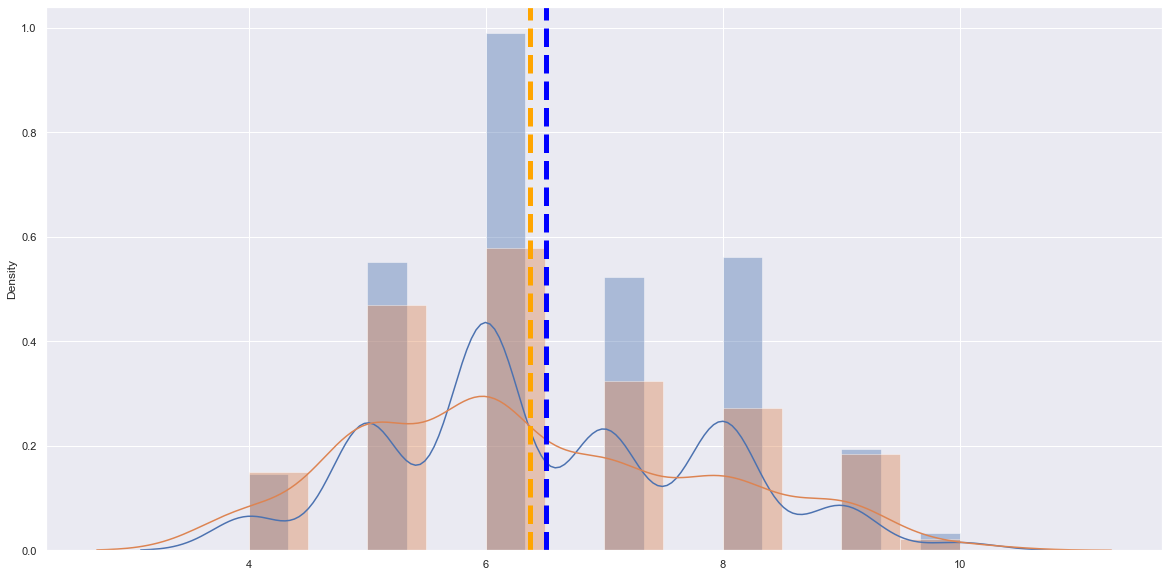

In [360]:
# Compare no restrictions vs. restrictions (overall)
plt.figure()
ax1 = sns.distplot(no_res_fsa)
ax2 = sns.distplot(res_fsa)
plt.axvline(np.mean(no_res_fsa), color='blue', linestyle='dashed', linewidth=5)    # No restrictions
plt.axvline(np.mean(res_fsa), color='orange', linestyle='dashed', linewidth=5)  # Restrictions

In [361]:
# T-test compare FSA between restrictions and no restrictions for all conditions 
stats.ttest_ind(no_res_fsa, res_fsa)

Ttest_indResult(statistic=1.8671791366319537, pvalue=0.062012188232495685)

In [372]:
print(no_res_fsa.mean())
print(res_fsa.mean())

6.505287896592244
6.370614035087719


* People with restrictions choose slightly healthier recipes overall. However result is not statisticaly significant.

### T-test between conditions

In [381]:
# T-test between conditions 1
stats.ttest_ind(c1_res['fsa_score'].to_numpy(), c1_no_res['fsa_score'].to_numpy())

Ttest_indResult(statistic=-1.0777517455914285, pvalue=0.28150701855644666)

In [382]:
# T-test between conditions 2
stats.ttest_ind(c2_res['fsa_score'].to_numpy(), c2_no_res['fsa_score'].to_numpy())

Ttest_indResult(statistic=-0.49964600073346216, pvalue=0.6174759576160925)

In [383]:
# T-test between conditions 3
stats.ttest_ind(c3_res['fsa_score'].to_numpy(), c3_no_res['fsa_score'].to_numpy())

Ttest_indResult(statistic=-1.371800507595901, pvalue=0.1705588546663843)

### T-test between variants in each condition restrictions vs no-restrictions

In [385]:
# T-test between variants condition 1 variant 1
stats.ttest_ind(c1v1_res_fsa, c1v1_no_res_fsa)

Ttest_indResult(statistic=-2.026235784942434, pvalue=0.04387527938946912)

In [545]:
print(stats.describe(c1v1_res_fsa))
print(stats.describe(c1v1_no_res_fsa))

DescribeResult(nobs=59, minmax=(4, 10), mean=6.084745762711864, variance=2.2168322618351843, skewness=1.0235337059131981, kurtosis=0.24624304460274837)
DescribeResult(nobs=177, minmax=(4, 10), mean=6.502824858757062, variance=1.7741397021058034, skewness=0.47134143699497927, kurtosis=-0.2862699205590551)


* People with restrictions choose healthier recipes in condition 1 Nutriscore with popular ranking

In [386]:
# T-test between variants condition 1 variant 2
stats.ttest_ind(c1v2_res_fsa, c1v2_no_res_fsa)

Ttest_indResult(statistic=-1.800179558765509, pvalue=0.07310387322757261)

In [387]:
# T-test between variants condition 1 variant 3
stats.ttest_ind(c1v3_res_fsa, c1v3_no_res_fsa)

Ttest_indResult(statistic=1.7829050864554097, pvalue=0.07585517664934677)

In [392]:
# T-test between variants condition 2 variant 1
stats.ttest_ind(c2v1_res_fsa, c2v1_no_res_fsa)

Ttest_indResult(statistic=-0.17262935322660364, pvalue=0.8630888762218873)

In [393]:
# T-test between variants condition 2 variant 2
stats.ttest_ind(c2v1_res_fsa, c2v1_no_res_fsa)

Ttest_indResult(statistic=-0.17262935322660364, pvalue=0.8630888762218873)

In [394]:
# T-test between variants condition 2 variant 3
stats.ttest_ind(c2v3_res_fsa, c2v3_no_res_fsa)

Ttest_indResult(statistic=-1.0819807863479929, pvalue=0.2803380264832358)

In [395]:
# T-test between variants condition 3 variant 1
stats.ttest_ind(c3v1_res_fsa, c3v1_no_res_fsa)

Ttest_indResult(statistic=0.7369272373511816, pvalue=0.46190167258060666)

In [396]:
# T-test between variants condition 3 variant 2
stats.ttest_ind(c3v2_res_fsa, c3v2_no_res_fsa)

Ttest_indResult(statistic=-1.1231776081321643, pvalue=0.2625130923790941)

In [397]:
# T-test between variants condition 3 variant 3 
stats.ttest_ind(c3v3_res_fsa, c3v3_no_res_fsa)

Ttest_indResult(statistic=-2.102274457099907, pvalue=0.03658469374799311)

* People with restrictions choose healthier recipes in condition 3 No-label with health ranking

### Closer look at condition 1 Nutriscore 

In [401]:
# V1: Popular ranking
print(c1v1_res_fsa.mean())
print(c1v1_no_res_fsa.mean())

# pvalue=0.04387527938946912 (significant)
# people with restrictions might be less influenced by popularity ranking since they have to inspect recipe moreclosely

6.084745762711864
6.502824858757062


* pvalue=0.04387527938946912 (significant)
* people with restrictions might be less influenced by popularity ranking since they have to inspect recipes more closely

In [402]:
# V2: Random ranking
print(c1v2_res_fsa.mean())
print(c1v2_no_res_fsa.mean())

6.186440677966102
6.538888888888889


In [404]:
# V3: Health ranking
print(c1v3_res_fsa.mean())
print(c1v3_no_res_fsa.mean())

# People without restrictions choose the healthies recipes with health ranking

6.758064516129032
6.3901098901098905


### Closer look at condition 3no-label, variant 3: health ranking

In [407]:
# V3: Health ranking
print(c3v3_res_fsa.mean())
print(c3v3_no_res_fsa.mean())

6.333333333333333
6.817258883248731


* pvalue=0.03658469374799311 
* People with restrictions choose healthier recipes than people without restrictions in the no-label condition with health ranking

# VEGAN vs. NON VEGANS

In [409]:
# Get user_id of all non vegan participants 
no_veg_id = md['user_id'].loc[md['restrictions'] != "vegan"].values
veg_id = md['user_id'].loc[md['restrictions'] == "vegan"].values

no_veg = ms[ms['user_id'].isin(no_veg_id)]
veg = ms[ms['user_id'].isin(veg_id)]

no_veg_fsa = no_veg['fsa_score'].to_numpy()
veg_fsa = veg['fsa_score'].to_numpy()


# Get conditions 
c1_veg = veg.loc[veg['condition'] == 1]
c2_veg = veg.loc[veg['condition'] == 2]
c3_veg = veg.loc[veg['condition'] == 3]

c1_no_veg = no_veg.loc[no_veg['condition'] == 1]
c2_no_veg = no_veg.loc[no_veg['condition'] == 2]
c3_no_veg = no_veg.loc[no_veg['condition'] == 3]
#no_veg['fsa_score'][no_veg['condition'] == 3].to_numpy()


# Condition 1 variants FSA score
c1v1_veg_fsa = c1_veg['fsa_score'][c1_veg['variant'] == 1].to_numpy()
c1v2_veg_fsa = c1_veg['fsa_score'][c1_veg['variant'] == 2].to_numpy()
c1v3_veg_fsa = c1_veg['fsa_score'][c1_veg['variant'] == 3].to_numpy()

c1v1_no_veg_fsa = c1_no_veg['fsa_score'][c1_no_veg['variant'] == 1].to_numpy()
c1v2_no_veg_fsa = c1_no_veg['fsa_score'][c1_no_veg['variant'] == 2].to_numpy()
c1v3_no_veg_fsa = c1_no_veg['fsa_score'][c1_no_veg['variant'] == 3].to_numpy()

# Condition 2 variants FSA score
c2v1_veg_fsa = c2_veg['fsa_score'][c2_veg['variant'] == 1].to_numpy()
c2v2_veg_fsa = c2_veg['fsa_score'][c2_veg['variant'] == 2].to_numpy()
c2v3_veg_fsa = c2_veg['fsa_score'][c2_veg['variant'] == 3].to_numpy()

c2v1_no_veg_fsa = c2_no_veg['fsa_score'][c2_no_veg['variant'] == 1].to_numpy()
c2v2_no_veg_fsa = c2_no_veg['fsa_score'][c2_no_veg['variant'] == 2].to_numpy()
c2v3_no_veg_fsa = c2_no_veg['fsa_score'][c2_no_veg['variant'] == 3].to_numpy()

# Condition 3 variants FSA score 
c3v1_veg_fsa = c3_veg['fsa_score'][c3_veg['variant'] == 1].to_numpy()
c3v2_veg_fsa = c3_veg['fsa_score'][c3_veg['variant'] == 2].to_numpy()
c3v3_veg_fsa = c3_veg['fsa_score'][c3_veg['variant'] == 3].to_numpy()

c3v1_no_veg_fsa = c3_no_veg['fsa_score'][c3_no_veg['variant'] == 1].to_numpy()
c3v2_no_veg_fsa = c3_no_veg['fsa_score'][c3_no_veg['variant'] == 2].to_numpy()
c3v3_no_veg_fsa = c3_no_veg['fsa_score'][c3_no_veg['variant'] == 3].to_numpy()


print("Non vegan:", len(no_veg_id))
print("Vegan:", len(veg_id))

Non vegan: 675
Vegan: 53


In [549]:
print(stats.describe(veg_fsa))
print(stats.describe(no_veg_fsa))

DescribeResult(nobs=161, minmax=(4, 10), mean=6.3602484472049685, variance=2.156909937888199, skewness=0.311723693415552, kurtosis=-0.7456826140236403)
DescribeResult(nobs=1997, minmax=(4, 10), mean=6.486229344016024, variance=1.8501359253308822, skewness=0.30680189325252405, kurtosis=-0.5564887315711546)


In [364]:
stats.ttest_ind(no_veg_fsa, veg_fsa)

Ttest_indResult(statistic=1.123630215346532, pvalue=0.2612950274003421)

* No difference in FSA for vegans vs non-vegans

# Compare FSA-score Europeans vs. American 

In [146]:
ame = ms[ms['user_id'].isin(n1)]
eur = ms[ms['user_id'].isin(n2)]

# Conditions
c1_ame = ame.loc[ame['condition'] == 1]
c2_ame = ame.loc[ame['condition'] == 2]
c3_ame = ame.loc[ame['condition'] == 3]

c1_eur = eur.loc[eur['condition'] == 1]
c2_eur = eur.loc[eur['condition'] == 2]
c3_eur = eur.loc[eur['condition'] == 3]

# FSA score per condition 
c1_ame_fsa = c1_ame['fsa_score'].to_numpy()
c2_ame_fsa = c2_ame['fsa_score'].to_numpy()
c3_ame_fsa = c3_ame['fsa_score'].to_numpy()

c1_eur_fsa = c1_eur['fsa_score'].to_numpy()
c2_eur_fsa = c2_eur['fsa_score'].to_numpy()
c3_eur_fsa = c3_eur['fsa_score'].to_numpy()

# Get FSA score for different within-subjects variables
# Condition 1 variants FSA score
c1v1_ame_fsa = c1_ame['fsa_score'][c1_ame['variant'] == 1].to_numpy()
c1v2_ame_fsa = c1_ame['fsa_score'][c1_ame['variant'] == 2].to_numpy()
c1v3_ame_fsa = c1_ame['fsa_score'][c1_ame['variant'] == 3].to_numpy()

c1v1_eur_fsa = c1_eur['fsa_score'][c1_eur['variant'] == 1].to_numpy()
c1v2_eur_fsa = c1_eur['fsa_score'][c1_eur['variant'] == 2].to_numpy()
c1v3_eur_fsa = c1_eur['fsa_score'][c1_eur['variant'] == 3].to_numpy()

# Condition 2 variants FSA score
c2v1_ame_fsa = c2_ame['fsa_score'][c2_ame['variant'] == 1].to_numpy()
c2v2_ame_fsa = c2_ame['fsa_score'][c2_ame['variant'] == 2].to_numpy()
c2v3_ame_fsa = c2_ame['fsa_score'][c2_ame['variant'] == 3].to_numpy()

c2v1_eur_fsa = c2_eur['fsa_score'][c2_eur['variant'] == 1].to_numpy()
c2v2_eur_fsa = c2_eur['fsa_score'][c2_eur['variant'] == 2].to_numpy()
c2v3_eur_fsa = c2_eur['fsa_score'][c2_eur['variant'] == 3].to_numpy()

# Condition 3 variants FSA score 
c3v1_ame_fsa = c3_ame['fsa_score'][c3_ame['variant'] == 1].to_numpy()
c3v2_ame_fsa = c3_ame['fsa_score'][c3_ame['variant'] == 2].to_numpy()
c3v3_ame_fsa = c3_ame['fsa_score'][c3_ame['variant'] == 3].to_numpy()

c3v1_eur_fsa = c3_eur['fsa_score'][c3_eur['variant'] == 1].to_numpy()
c3v2_eur_fsa = c3_eur['fsa_score'][c3_eur['variant'] == 2].to_numpy()
c3v3_eur_fsa = c3_eur['fsa_score'][c3_eur['variant'] == 3].to_numpy()


In [550]:
ame_fsa = ame['fsa_score'].to_numpy()
eur_fsa = eur['fsa_score'].to_numpy()
print(stats.describe(ame_fsa))
print(stats.describe(eur_fsa))

DescribeResult(nobs=1053, minmax=(4, 10), mean=6.528964862298196, variance=1.8919834331748149, skewness=0.3232844037227739, kurtosis=-0.607415031287661)
DescribeResult(nobs=902, minmax=(4, 10), mean=6.433481152993348, variance=1.8707090667920099, skewness=0.2750017447498526, kurtosis=-0.5615323820091684)


In [117]:
f_oneway(ame_fsa, eur_fsa)

F_onewayResult(statistic=2.3533589162055684, pvalue=0.1251753535076248)

* No stat dif FSA score Americans vs. European

# Nationality: Compare FSA between conditions (American vs. European)

In [134]:
f_oneway(c1_ame_fsa, c1_eur_fsa)

F_onewayResult(statistic=0.07473236900445114, pvalue=0.7846496287347811)

In [142]:
print(c1_ame_fsa.mean())
print( c1_eur_fsa.mean())

6.462162162162162
6.4335443037974684


In [135]:
f_oneway(c2_ame_fsa, c2_eur_fsa)

F_onewayResult(statistic=3.2798939239696785, pvalue=0.07061497660278497)

In [140]:
print(c2_ame_fsa.mean())
print( c2_eur_fsa.mean())

6.44213649851632
6.246527777777778


In [139]:
 c2_eur_fsa.mean()

6.246527777777778

In [136]:
f_oneway(c3_ame_fsa, c3_eur_fsa)

F_onewayResult(statistic=0.41733513632126035, pvalue=0.5185006058583674)

In [143]:
print(c3_ame_fsa.mean())
print( c3_eur_fsa.mean())

6.684971098265896
6.614093959731544


* Biggest difference is for the MTL label (condition 2), however not statistically significant difference. Europeans choose slightly healthier recipes overall. 

## Compare FSA between within-subjects variables for each condition, grouped by American/ European

#### Condition 1 variants

In [147]:
f_oneway(c1v1_ame_fsa, c1v1_eur_fsa)

F_onewayResult(statistic=0.036898644162980686, pvalue=0.8478463574426364)

In [148]:
f_oneway(c1v2_ame_fsa, c1v2_eur_fsa)

F_onewayResult(statistic=0.49467301412349546, pvalue=0.48257407708951705)

In [149]:
f_oneway(c1v3_ame_fsa, c1v3_eur_fsa)

F_onewayResult(statistic=0.8379963713854206, pvalue=0.360925044269753)

#### Condition 2 variants

In [152]:
f_oneway(c2v1_ame_fsa, c2v1_eur_fsa)

F_onewayResult(statistic=2.8479787645855223, pvalue=0.09300235042908193)

In [153]:
f_oneway(c2v2_ame_fsa, c2v2_eur_fsa)

F_onewayResult(statistic=0.0031896646107806284, pvalue=0.9550162017287244)

In [154]:
f_oneway(c2v3_ame_fsa, c2v3_eur_fsa)

F_onewayResult(statistic=2.255987378381639, pvalue=0.13462984842733516)

#### Condition 3 variants

In [155]:
f_oneway(c3v1_ame_fsa, c3v1_eur_fsa)

F_onewayResult(statistic=0.6742185087368571, pvalue=0.4125070798359254)

In [156]:
f_oneway(c3v2_ame_fsa, c3v2_eur_fsa)

F_onewayResult(statistic=0.003245366719902473, pvalue=0.9546245006664426)

In [157]:
f_oneway(c3v3_ame_fsa, c3v3_eur_fsa)

F_onewayResult(statistic=0.043891444634178045, pvalue=0.8342540880404514)

### Interpretation: 
* No significant difference when comparing Americans and Europeans with regards to different variants

# Education: 

In [ ]:
# Educati.loc[less_high['condition'] == 1]
lh2 = less_high.loc[less_high['condition'] == 2]
lh3 = less_high.loc[less_high['condition'] == 3]on 
e1 = md['user_id'].loc[md['education'] == 1].values
e2 = md['user_id'].loc[md['education'] == 2].values
e3 = md['user_id'].loc[md['education'] == 3].values
e4 = md['user_id'].loc[md['education'] == 4].values
e5 = md['user_id'].loc[md['education'] == 5].values
# Prefer not say: e6 = md['user_id'].loc[md['education'] == 6].values


In [167]:
less_high = ms[ms['user_id'].isin(e1)]
high = ms[ms['user_id'].isin(e2)]
bachelor = ms[ms['user_id'].isin(e3)]
master = ms[ms['user_id'].isin(e4)]
doc = ms[ms['user_id'].isin(e5)]

lh1 = less_high.loc[less_high['condition'] == 1]
lh2 = less_high.loc[less_high['condition'] == 2]
lh3 = less_high.loc[less_high['condition'] == 3]

# Conditions
c1_ame = ame.loc[ame['condition'] == 1]
c2_ame = ame.loc[ame['condition'] == 2]
c3_ame = ame.loc[ame['condition'] == 3]

c1_eur = eur.loc[eur['condition'] == 1]
c2_eur = eur.loc[eur['condition'] == 2]
c3_eur = eur.loc[eur['condition'] == 3]

# Conditions FSA
c1_less_high = less_high['fsa_score'][less_high['condition'] == 1].to_numpy()
c2_less_high = less_high['fsa_score'][less_high['condition'] == 2].to_numpy()
c3_less_high = less_high['fsa_score'][less_high['condition'] == 3].to_numpy()

c1_high = high['fsa_score'][high['condition'] == 1].to_numpy()
c2_high = high['fsa_score'][high['condition'] == 2].to_numpy()
c3_high = high['fsa_score'][high['condition'] == 3].to_numpy()

c1_bachelor = bachelor['fsa_score'][bachelor['condition'] == 1].to_numpy()
c2_bachelor = bachelor['fsa_score'][bachelor['condition'] == 2].to_numpy()
c3_bachelor = bachelor['fsa_score'][bachelor['condition'] == 3].to_numpy()

c1_master = master['fsa_score'][master['condition'] == 1].to_numpy()
c2_master = master['fsa_score'][master['condition'] == 2].to_numpy()
c3_master = master['fsa_score'][master['condition'] == 3].to_numpy()

c1_doc = doc['fsa_score'][doc['condition'] == 1].to_numpy()
c2_doc = doc['fsa_score'][doc['condition'] == 2].to_numpy()
c3_doc = doc['fsa_score'][doc['condition'] == 3].to_numpy()

# Get FSA score for different within-subjects variables
# Condition 1 variants FSA score
c1v1_lh_fsa = lh1['fsa_score'][lh1['variant'] == 1].to_numpy()
c1v2_lh_fsa = lh1['fsa_score'][lh1['variant'] == 2].to_numpy()
c1v3_lh_fsa = lh1['fsa_score'][lh1['variant'] == 3].to_numpy()

# Condition 1 variants FSA score
c1v1_lh_fsa = lh1['fsa_score'][lh1['variant'] == 1].to_numpy()
c1v2_lh_fsa = lh1['fsa_score'][lh1['variant'] == 2].to_numpy()
c1v3_lh_fsa = lh1['fsa_score'][lh1['variant'] == 3].to_numpy()

# Condition 1 variants FSA score
c1v1_lh_fsa = lh1['fsa_score'][lh1['variant'] == 1].to_numpy()
c1v2_lh_fsa = lh1['fsa_score'][lh1['variant'] == 2].to_numpy()
c1v3_lh_fsa = lh1['fsa_score'][lh1['variant'] == 3].to_numpy()




In [ ]:
# Overall comparison

In [160]:
f_oneway(c1_less_high, c1_high, c1_bachelor, c1_master, c1_doc)

F_onewayResult(statistic=1.1014118259709829, pvalue=0.3547866725323077)

In [161]:
f_oneway(c2_less_high, c2_high, c2_bachelor, c2_master, c2_doc)

F_onewayResult(statistic=0.5678167749385556, pvalue=0.6860833424770949)

In [162]:
f_oneway(c3_less_high, c3_high, c3_bachelor, c3_master, c3_doc)

F_onewayResult(statistic=0.18965442128783647, pvalue=0.9438204495244502)

In [ ]:
### Condition 1 variants

In [ ]:
stats.ttestf_oneway(c1v1_ame_fsa, c1v1_eur_fsa)_ind(c1v1_ame_fsa, c1v1_eur_fsa)

### Interpretation: 
Not much difference in FSA score when comparing the different conditions and grouping by education. 

# Dietary goals: 

* Dietary goals
* Eat more protein
* Eat less salt
* Eat more fruit
* Eat more vegetables
* Lose weight
* Gain weight
* No goals
* other_text


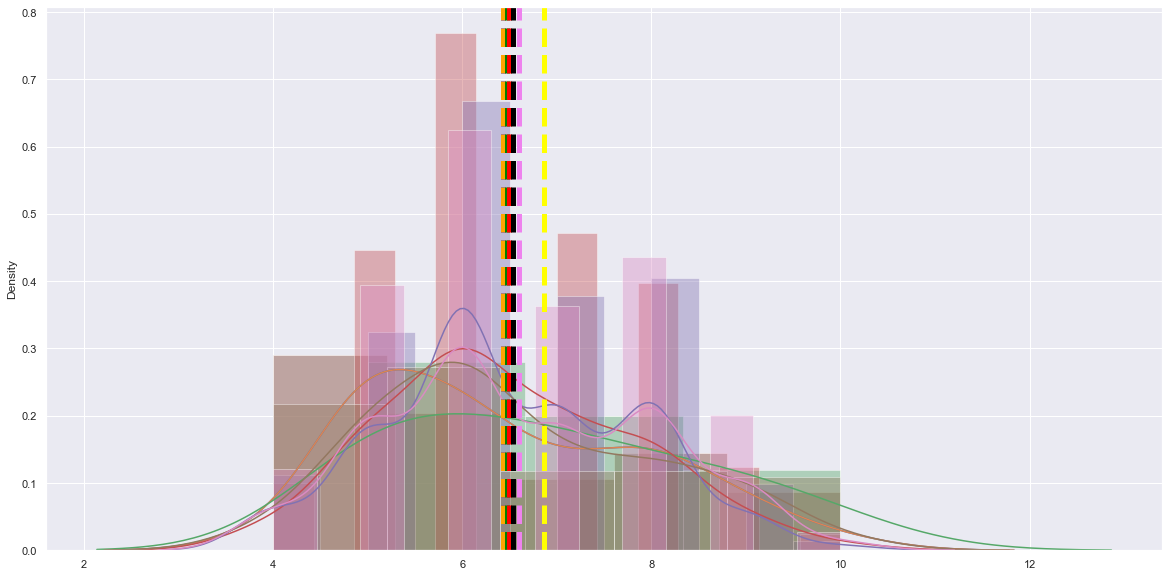

In [206]:
pr = ms[ms['user_id'].isin(g1)]
sa = ms[ms['user_id'].isin(g1)]
fr = ms[ms['user_id'].isin(g3)]
vg = ms[ms['user_id'].isin(g4)]
lwe = ms[ms['user_id'].isin(g5)]
gwe = ms[ms['user_id'].isin(g6)]
none = ms[ms['user_id'].isin(g7)]

pr1 = pr.loc[pr['condition'] == 1]
pr2 = pr.loc[pr['condition'] == 2]
pr3 = pr.loc[pr['condition'] == 3]

sa1 = sa.loc[sa['condition'] == 1]
sa2 = sa.loc[sa['condition'] == 2]
sa3 = sa.loc[sa['condition'] == 3]

vg1 = vg.loc[vg['condition'] == 1]
vg2 = vg.loc[vg['condition'] == 2]
vg3 = vg.loc[vg['condition'] == 3]

fr1 = fr.loc[fr['condition'] == 1]
fr2 = fr.loc[fr['condition'] == 2]
fr3 = fr.loc[fr['condition'] == 3]

lwe1 = lwe.loc[lwe['condition'] == 1]
lwe2 = lwe.loc[lwe['condition'] == 2]
lwe3 = lwe.loc[lwe['condition'] == 3]

gwe1 = gwe.loc[gwe['condition'] == 1]
gwe2 = gwe.loc[gwe['condition'] == 2]
gwe3 = gwe.loc[gwe['condition'] == 3]

none1 = none.loc[none['condition'] == 1]
none2 = none.loc[none['condition'] == 2]
none3 = none.loc[none['condition'] == 3]


# Get FSA score for each group 
pr_fsa = pr['fsa_score'].to_numpy()
sa_fsa = sa['fsa_score'].to_numpy()
fr_fsa = fr['fsa_score'].to_numpy()
vg_fsa = vg['fsa_score'].to_numpy()
lwe_fsa = lwe['fsa_score'].to_numpy()
gwe_fsa = gwe['fsa_score'].to_numpy()
none_fsa = none['fsa_score'].to_numpy()

# Get FSA score for different within-subjects variables
# Condition 1 variants FSA score
# Condition 1 variants FSA score
c1v1_pr_fsa = pr['fsa_score'][pr['variant'] == 1].to_numpy()
c1v2_pr_fsa = pr['fsa_score'][pr['variant'] == 2].to_numpy()
c1v3_pr_fsa = pr['fsa_score'][pr['variant'] == 3].to_numpy()

# Condition 2 variants FSA score

# Condition 3 variants FSA score


# Compare FSA score
plt.figure()
ax1 = sns.distplot(pr_fsa)
ax2 = sns.distplot(sa_fsa)
ax3 = sns.distplot(fr_fsa)
ax4 = sns.distplot(vg_fsa)
ax5 = sns.distplot(lwe_fsa)
ax6 = sns.distplot(gwe_fsa)
ax7 = sns.distplot(none_fsa)


plt.axvline(np.mean(pr_fsa), color='blue', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(sa_fsa), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(fr_fsa), color='yellow', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(vg_fsa), color='green', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(lwe_fsa), color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(gwe_fsa), color='black', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(none_fsa), color='violet', linestyle='dashed', linewidth=5)


# Orange = Eat less salt
# Yellow = Eat more fruit (least healhty, but also smallest group)

In [207]:
print(len(pr))
print(len(sa))
print(len(fr))
print(len(vg))
print(len(lwe))
print(len(gwe))
print(len(none))

86
86
15
94
449
92
572


In [208]:
# Compare Condition 1 FSA
f_oneway(pr1['fsa_score'].to_numpy(), sa1['fsa_score'].to_numpy(), vg1['fsa_score'].to_numpy(), fr1['fsa_score'].to_numpy(), lwe1['fsa_score'].to_numpy(), gwe1['fsa_score'].to_numpy(), none1['fsa_score'].to_numpy())

F_onewayResult(statistic=0.4761452327276852, pvalue=0.8261546856504182)

In [209]:
# COmapre condition 2 FSA
f_oneway(pr2['fsa_score'].to_numpy(), sa2['fsa_score'].to_numpy(), vg2['fsa_score'].to_numpy(), fr2['fsa_score'].to_numpy(), lwe2['fsa_score'].to_numpy(), gwe2['fsa_score'].to_numpy(), none2['fsa_score'].to_numpy())

F_onewayResult(statistic=1.1987913123153562, pvalue=0.30562497437625114)

In [210]:
# Compare condition 3 FSA
f_oneway(pr3['fsa_score'].to_numpy(), sa3['fsa_score'].to_numpy(), vg3['fsa_score'].to_numpy(), fr3['fsa_score'].to_numpy(), lwe3['fsa_score'].to_numpy(), gwe3['fsa_score'].to_numpy(), none3['fsa_score'].to_numpy())

F_onewayResult(statistic=0.35719662173911254, pvalue=0.9056470924424069)

# Cooking experience: 

In [649]:
# Cooking experience
c1 = md['user_id'].loc[md['experience'] == "cverylow"].values
c2 = md['user_id'].loc[md['experience'] == "clow"].values
c3 = md['user_id'].loc[md['experience'] == "cmedium"].values
c4 = md['user_id'].loc[md['experience'] == "chigh"].values
c5 = md['user_id'].loc[md['experience'] == "cveryhigh"].values

In [650]:
pr = ms[ms['user_id'].isin(c1)]
sa = ms[ms['user_id'].isin(c2)]
fr = ms[ms['user_id'].isin(c3)]
vg = ms[ms['user_id'].isin(c4)]
lwe = ms[ms['user_id'].isin(c5)]


pr1 = pr.loc[pr['condition'] == 1] # Very low
pr2 = pr.loc[pr['condition'] == 2]
pr3 = pr.loc[pr['condition'] == 3]

sa1 = sa.loc[sa['condition'] == 1] # Low
sa2 = sa.loc[sa['condition'] == 2]
sa3 = sa.loc[sa['condition'] == 3]

vg1 = vg.loc[vg['condition'] == 1] # Medium
vg2 = vg.loc[vg['condition'] == 2]
vg3 = vg.loc[vg['condition'] == 3]

fr1 = fr.loc[fr['condition'] == 1] # High
fr2 = fr.loc[fr['condition'] == 2]
fr3 = fr.loc[fr['condition'] == 3]

lwe1 = lwe.loc[lwe['condition'] == 1] # Very high
lwe2 = lwe.loc[lwe['condition'] == 2]
lwe3 = lwe.loc[lwe['condition'] == 3]

# Condition 1 variants FSA score

# Condition 2 variants FSA score

# Condition 3 variants FSA score


# Get FSA score for each group 
pr_fsa = pr['fsa_score'].to_numpy()
sa_fsa = sa['fsa_score'].to_numpy()
fr_fsa = fr['fsa_score'].to_numpy()
vg_fsa = vg['fsa_score'].to_numpy()
lwe_fsa = lwe['fsa_score'].to_numpy()
gwe_fsa = gwe['fsa_score'].to_numpy()
none_fsa = none['fsa_score'].to_numpy()

In [ ]:
## Compare cooking experience within 

In [651]:
# Compare Condition 1 FSA
f_oneway(pr1['fsa_score'].to_numpy(), sa1['fsa_score'].to_numpy(), vg1['fsa_score'].to_numpy(), fr1['fsa_score'].to_numpy(), lwe1['fsa_score'].to_numpy())

F_onewayResult(statistic=2.208970599061608, pvalue=0.06647765613587168)

In [652]:
# Compare condition 2 FSA
f_oneway(pr2['fsa_score'].to_numpy(), sa2['fsa_score'].to_numpy(), vg2['fsa_score'].to_numpy(), fr2['fsa_score'].to_numpy(), lwe2['fsa_score'].to_numpy())

F_onewayResult(statistic=0.5250167624454278, pvalue=0.717387606821279)

In [653]:
f_oneway(pr3['fsa_score'].to_numpy(), sa3['fsa_score'].to_numpy(), vg3['fsa_score'].to_numpy(), fr3['fsa_score'].to_numpy(), lwe3['fsa_score'].to_numpy())

F_onewayResult(statistic=0.5343464659428293, pvalue=0.7105458774714402)

In [234]:
# Closer look at condition 1 
# Ver low
pr1['fsa_score'].to_numpy().mean()

# Participants with lowest cooking experience choose the healtiest recipes in the Nutri score condition

5.75

In [643]:
# Low
print(sa1['fsa_score'].to_numpy().mean())
print(sa2['fsa_score'].to_numpy().mean())
print(sa3['fsa_score'].to_numpy().mean())


6.438095238095238
6.441441441441442
6.819277108433735


In [236]:
# Medium 
vg1['fsa_score'].to_numpy().mean()

6.564971751412429

In [237]:
# High
fr1['fsa_score'].to_numpy().mean()

6.469387755102041

In [220]:
# Very high
lwe1['fsa_score'].to_numpy().mean()

6.261904761904762

In [245]:
stats.ttest_ind(pr1['fsa_score'].to_numpy(),sa1['fsa_score'].to_numpy() )

Ttest_indResult(statistic=-2.2388101875769726, pvalue=0.026592261993160133)

In [246]:
stats.ttest_ind(pr1['fsa_score'].to_numpy(),vg1['fsa_score'].to_numpy() )

Ttest_indResult(statistic=-2.825059142761399, pvalue=0.005208739017764834)

In [248]:
stats.ttest_ind(pr1['fsa_score'].to_numpy(),fr1['fsa_score'].to_numpy() )

Ttest_indResult(statistic=-2.4429905937757073, pvalue=0.015039440219702828)

In [249]:
stats.ttest_ind(pr1['fsa_score'].to_numpy(),lwe1['fsa_score'].to_numpy() )

Ttest_indResult(statistic=-1.5216770732743936, pvalue=0.1330158086714692)

### Interpretation: 
* Participants with lowest cooking experience choose the healtiest recipes in the Nutri score condition
* 

# Eating habits

In [262]:
# Eating habits
h1 = md['user_id'].loc[md['eating_habits'] == "vunhealthy"].values
h2 = md['user_id'].loc[md['eating_habits'] == "unhealthy"].values
h3 = md['user_id'].loc[md['eating_habits'] == "neutral"].values
h4 = md['user_id'].loc[md['eating_habits'] == "healthy"].values
h5 = md['user_id'].loc[md['eating_habits'] == "vhealhty"].values

In [287]:
pr = ms[ms['user_id'].isin(h1)]
sa = ms[ms['user_id'].isin(h2)]
fr = ms[ms['user_id'].isin(h3)]
vg = ms[ms['user_id'].isin(h4)]
lwe = ms[ms['user_id'].isin(h5)]

# Get all conditions 
pr1 = pr.loc[pr['condition'] == 1]
pr2 = pr.loc[pr['condition'] == 2]
pr3 = pr.loc[pr['condition'] == 3]

sa1 = sa.loc[sa['condition'] == 1]
sa2 = sa.loc[sa['condition'] == 2]
sa3 = sa.loc[sa['condition'] == 3]

vg1 = vg.loc[vg['condition'] == 1]
vg2 = vg.loc[vg['condition'] == 2]
vg3 = vg.loc[vg['condition'] == 3]

fr1 = fr.loc[fr['condition'] == 1]
fr2 = fr.loc[fr['condition'] == 2]
fr3 = fr.loc[fr['condition'] == 3]

lwe1 = lwe.loc[lwe['condition'] == 1]
lwe2 = lwe.loc[lwe['condition'] == 2]
lwe3 = lwe.loc[lwe['condition'] == 3]

# Get FSA score for different within-subjects variables
# Condition 1 variants FSA score
c1v1_pr1_fsa = pr1['fsa_score'][pr1['variant'] == 1].to_numpy()
c1v2_pr1_fsa = pr1['fsa_score'][pr1['variant'] == 2].to_numpy()
c1v3_pr1_fsa = pr1['fsa_score'][pr1['variant'] == 3].to_numpy()

c1v1_sa1_fsa = sa1['fsa_score'][sa1['variant'] == 1].to_numpy()
c1v2_sa1_fsa = sa1['fsa_score'][sa1['variant'] == 2].to_numpy()
c1v3_sa1_fsa = sa1['fsa_score'][sa1['variant'] == 3].to_numpy()

c1v1_vg1_fsa = vg1['fsa_score'][vg1['variant'] == 1].to_numpy()
c1v2_vg1_fsa = vg1['fsa_score'][vg1['variant'] == 2].to_numpy()
c1v3_vg1_fsa = vg1['fsa_score'][vg1['variant'] == 3].to_numpy()

c1v1_fr1_fsa = fr1['fsa_score'][fr1['variant'] == 1].to_numpy()
c1v2_fr1_fsa = fr1['fsa_score'][fr1['variant'] == 2].to_numpy()
c1v3_fr1_fsa = fr1['fsa_score'][fr1['variant'] == 3].to_numpy()

c1v1_lwe1_fsa = lwe1['fsa_score'][lwe1['variant'] == 1].to_numpy()
c1v2_lwe1_fsa = lwe1['fsa_score'][lwe1['variant'] == 2].to_numpy()
c1v3_lwe1_fsa = lwe1['fsa_score'][lwe1['variant'] == 3].to_numpy()

# Condition 2 variants FSA score
c2v1_pr2_fsa = pr2['fsa_score'][pr2['variant'] == 1].to_numpy()
c2v2_pr2_fsa = pr2['fsa_score'][pr2['variant'] == 2].to_numpy()
c2v3_pr2_fsa = pr2['fsa_score'][pr2['variant'] == 3].to_numpy()

c2v1_sa2_fsa = sa2['fsa_score'][sa2['variant'] == 1].to_numpy()
c2v2_sa2_fsa = sa2['fsa_score'][sa2['variant'] == 2].to_numpy()
c2v3_sa2_fsa = sa2['fsa_score'][sa2['variant'] == 3].to_numpy()

c2v1_vg2_fsa = vg2['fsa_score'][vg2['variant'] == 1].to_numpy()
c2v2_vg2_fsa = vg2['fsa_score'][vg2['variant'] == 2].to_numpy()
c2v3_vg2_fsa = vg2['fsa_score'][vg2['variant'] == 3].to_numpy()

c2v1_fr2_fsa = fr2['fsa_score'][fr2['variant'] == 1].to_numpy()
c2v2_fr2_fsa = fr2['fsa_score'][fr2['variant'] == 2].to_numpy()
c2v3_fr2_fsa = fr2['fsa_score'][fr2['variant'] == 3].to_numpy()

c2v1_lwe2_fsa = lwe2['fsa_score'][lwe2['variant'] == 1].to_numpy()
c2v2_lwe2_fsa = lwe2['fsa_score'][lwe2['variant'] == 2].to_numpy()
c2v3_lwe2_fsa = lwe2['fsa_score'][lwe2['variant'] == 3].to_numpy()


# Condition 3 variants FSA score 
c3v1_pr3_fsa = pr3['fsa_score'][pr3['variant'] == 1].to_numpy()
c3v2_pr3_fsa = pr3['fsa_score'][pr3['variant'] == 2].to_numpy()
c3v3_pr3_fsa = pr3['fsa_score'][pr3['variant'] == 3].to_numpy()

c3v1_sa3_fsa = sa3['fsa_score'][sa3['variant'] == 1].to_numpy()
c3v2_sa3_fsa = sa3['fsa_score'][sa3['variant'] == 2].to_numpy()
c3v3_sa3_fsa = sa3['fsa_score'][sa3['variant'] == 3].to_numpy()

c3v1_vg3_fsa = vg3['fsa_score'][vg3['variant'] == 1].to_numpy()
c3v2_vg3_fsa = vg3['fsa_score'][vg3['variant'] == 2].to_numpy()
c3v3_vg3_fsa = vg3['fsa_score'][vg3['variant'] == 3].to_numpy()

c3v1_fr3_fsa = fr3['fsa_score'][fr3['variant'] == 1].to_numpy()
c3v2_fr3_fsa = fr3['fsa_score'][fr3['variant'] == 2].to_numpy()
c3v3_fr3_fsa = fr3['fsa_score'][fr3['variant'] == 3].to_numpy()

c3v1_lwe3_fsa = lwe3['fsa_score'][lwe3['variant'] == 1].to_numpy()
c3v2_lwe3_fsa = lwe3['fsa_score'][lwe3['variant'] == 2].to_numpy()
c3v3_lwe3_fsa = lwe3['fsa_score'][lwe3['variant'] == 3].to_numpy()


## Compare FSA between conditions 

In [288]:
# Compare Condition 1 FSA
f_oneway(pr1['fsa_score'].to_numpy(), sa1['fsa_score'].to_numpy(), vg1['fsa_score'].to_numpy(), fr1['fsa_score'].to_numpy(), lwe1['fsa_score'].to_numpy())

F_onewayResult(statistic=0.10212051514971655, pvalue=0.9817387057783373)

In [289]:
# Cond 2 FSA
f_oneway(pr2['fsa_score'].to_numpy(), sa2['fsa_score'].to_numpy(), vg2['fsa_score'].to_numpy(), fr2['fsa_score'].to_numpy(), lwe2['fsa_score'].to_numpy())

F_onewayResult(statistic=1.8827240887369743, pvalue=0.11161003531239228)

In [290]:
# COnd 3 FSA
f_oneway(pr3['fsa_score'].to_numpy(), sa3['fsa_score'].to_numpy(), vg3['fsa_score'].to_numpy(), fr3['fsa_score'].to_numpy(), lwe3['fsa_score'].to_numpy())

F_onewayResult(statistic=1.2816190709937862, pvalue=0.2756806844564364)

In [ ]:
# Condition 2 closer look

In [267]:
pr2['fsa_score'].to_numpy().mean()

6.352941176470588

In [269]:
sa2['fsa_score'].to_numpy().mean()

6.441441441441442

In [270]:
vg2['fsa_score'].to_numpy().mean() # Neutral

6.181818181818182

In [271]:
fr2['fsa_score'].to_numpy().mean() # Healthy

6.478102189781022

In [272]:
lwe2['fsa_score'].to_numpy().mean()

6.358974358974359

In [275]:
# Difference between those with Neutral eating habits and healthy eating habits. 
stats.ttest_ind(vg2['fsa_score'].to_numpy(), fr2['fsa_score'].to_numpy())

Ttest_indResult(statistic=-2.6434683400172485, pvalue=0.008436841812230797)

## Compare variants within conditions based on group

In [291]:
# Compare variants in condition 1 
print(f_oneway(c1v1_pr1_fsa, c1v1_sa1_fsa, c1v1_vg1_fsa, c1v1_fr1_fsa, c1v1_lwe1_fsa ))
print(f_oneway(c1v2_pr1_fsa, c1v2_sa1_fsa, c1v2_vg1_fsa, c1v2_fr1_fsa, c1v2_lwe1_fsa ))
print(f_oneway(c1v3_pr1_fsa, c1v3_sa1_fsa, c1v3_vg1_fsa, c1v3_fr1_fsa, c1v3_lwe1_fsa ))

F_onewayResult(statistic=0.11354402739591983, pvalue=0.9776687319180382)
F_onewayResult(statistic=0.8920903280452316, pvalue=0.46933804066117324)
F_onewayResult(statistic=1.2758272436801972, pvalue=0.28012646222650084)


In [297]:
# Compare variants in condition 2
print(f_oneway(c2v1_pr2_fsa, c2v1_sa2_fsa, c2v1_vg2_fsa, c2v1_fr2_fsa, c2v1_lwe2_fsa ))
print(f_oneway(c2v2_pr2_fsa, c2v2_sa2_fsa, c2v2_vg2_fsa, c2v2_fr2_fsa, c2v2_lwe2_fsa ))
print(f_oneway(c2v3_pr2_fsa, c2v3_sa2_fsa, c2v3_vg2_fsa, c2v3_fr2_fsa, c2v3_lwe2_fsa ))

F_onewayResult(statistic=2.670460841072331, pvalue=0.03291885617810335)
F_onewayResult(statistic=0.23750364757600437, pvalue=0.9169691749260217)
F_onewayResult(statistic=0.7357654448417507, pvalue=0.5683741035714385)


In [456]:
print(c2v1_pr2_fsa.mean()) # Very unhealthy
print(c2v1_sa2_fsa.mean()) # Unhealthy
print(c2v1_vg2_fsa.mean()) # Healthy
print(c2v1_fr2_fsa.mean()) # Neutral
print(c2v1_lwe2_fsa.mean()) # Very healthy

6.333333333333333
6.324324324324325
6.0212765957446805
6.615384615384615
6.538461538461538


In [295]:
# Compare variants in condition 3
print(f_oneway(c3v1_pr3_fsa, c3v1_sa3_fsa, c3v1_vg3_fsa, c3v1_fr3_fsa, c3v1_lwe3_fsa ))
print(f_oneway(c3v2_pr3_fsa, c3v2_sa3_fsa, c3v2_vg3_fsa, c3v2_fr3_fsa, c3v2_lwe3_fsa ))
print(f_oneway(c3v3_pr3_fsa, c3v3_sa3_fsa, c3v3_vg3_fsa, c3v3_fr3_fsa, c3v3_lwe3_fsa ))

F_onewayResult(statistic=0.39742875651256276, pvalue=0.8103902113288756)
F_onewayResult(statistic=0.5455504108863636, pvalue=0.7024481268804733)
F_onewayResult(statistic=1.0770686266418072, pvalue=0.3685216943514892)


# MTL → any nutrients that were especially influential across the 3 different choices of recipes?
* Look at answers in end survey

In [39]:
# End survey
e1 = pd.read_csv("./Pro_1/endsurvey.csv")
e2 = pd.read_csv("./Pro_2/endsurvey.csv")
e3 = pd.read_csv("./Pro_3/endsurvey.csv")

# Clean label_q3 column
e1['label_q3'] = e1['label_q3'].str.strip('[]').astype(str)
e1['label_q3'] = e1['label_q3'].str.replace('"', '')
e1['label_q3'] = e1['label_q3'].astype(str)

e2['label_q3'] = e2['label_q3'].str.strip('[]').astype(str)
e2['label_q3'] = e2['label_q3'].str.replace('"', '')
e2['label_q3'] = e2['label_q3'].astype(str)

e3['label_q3'] = e3['label_q3'].str.strip('[]').astype(str)
e3['label_q3'] = e3['label_q3'].str.replace('"', '')
e3['label_q3'] = e3['label_q3'].astype(str)

# Get user_id
#ame_end = e1[e1['user_id'].isin(n1)]
#eur_end = e1[e1['user_id'].isin(n2)]

In [13]:
e1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    243 non-null    int64 
 1   user_id       243 non-null    int64 
 2   condition     243 non-null    int64 
 3   submitted_at  243 non-null    object
 4   label_q1      243 non-null    int64 
 5   label_q2      243 non-null    int64 
 6   label_q3      243 non-null    object
dtypes: int64(5), object(2)
memory usage: 13.4+ KB


In [38]:
e1['label_q3'] = e1['label_q3'].str.split(",",expand=True).replace(['image','ingredient','health','title','cal', 'rating', 'goals', 'numrating'],['Attractive images','A specific ingredient','Healthiness','Recipe title','Calories', 'High ratings', 'My health goals', 'Number of ratings'])

#e1['label_q3'] = e1['label_q3'].replace([1,2,3,4,5,6],['Less than high school','High school or equivalent','Bacherlor degree (e.g. BA, BSc)','Master degree (e.g. MA, MSc)', 'Doctorate (e.g. PhD)', 'Prefer not to say'])


TypeError: repl must be a string or callable

[Text(0.5, 0, 'Which factors influenced your recipe choices the most?'),
 Text(0, 0.5, 'Count')]

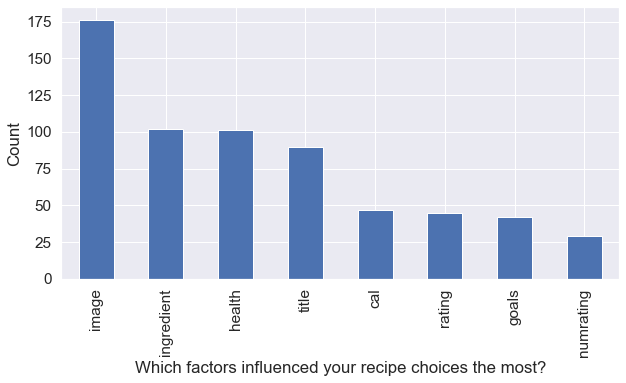

In [47]:
# Nutriscore
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)

md['gender'] = md['gender'].replace(['male','female','other'], ['Male','Female','Other'])





ax = e1['label_q3'].str.split(",",expand=True).stack().value_counts().nlargest(8).plot(kind='bar')
ax.set(xlabel="Which factors influenced your recipe choices the most?", ylabel = "Count")

#plt.savefig('ns_endq3.png')


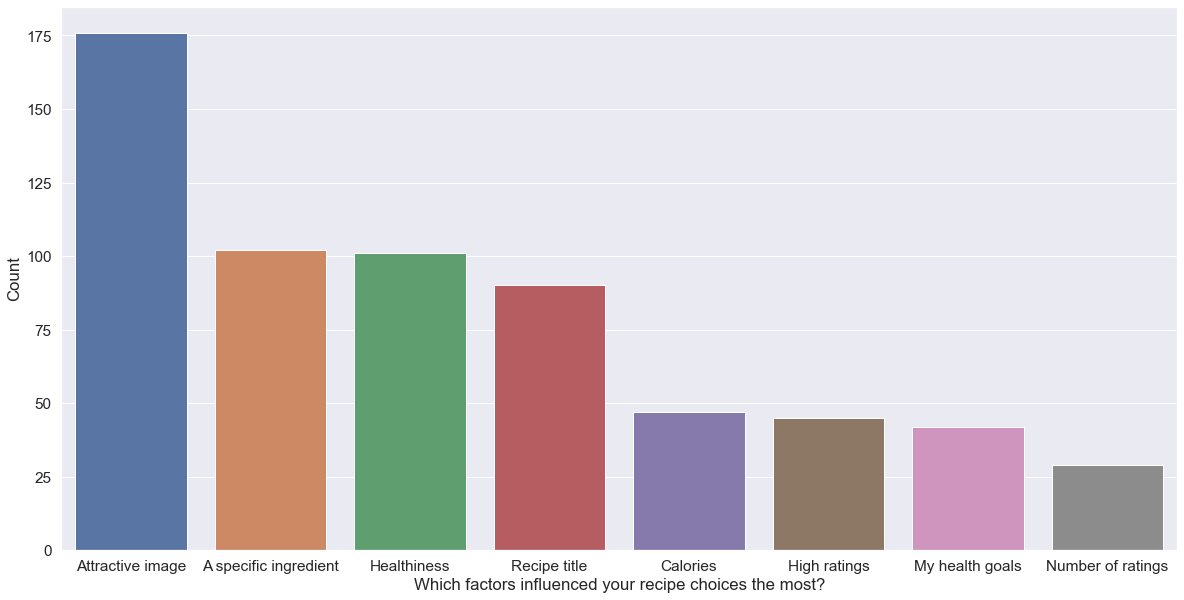

In [64]:
# NUTRISCORE q3
ns = {'Which factors influenced your recipe choices the most?':["Attractive image","A specific ingredient","Healthiness","Recipe title","Calories","High ratings","My health goals","Number of ratings"], 'Count':[176,102,101,90,47,45,42,29]}
ns = pd.DataFrame(data=ns)
#ns["Count"].plot(kind="bar")
sns.barplot(data=ns, x='Which factors influenced your recipe choices the most?', y="Count")
plt.savefig('ns_endq3.png')


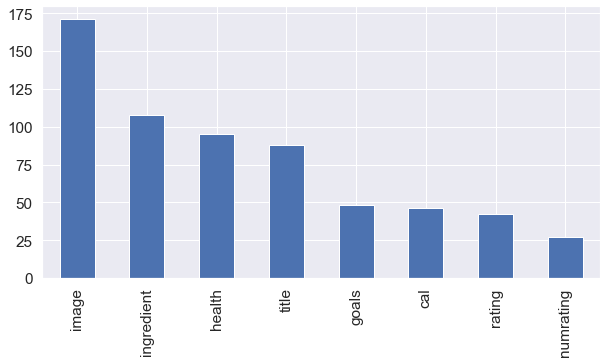

In [42]:
# MTL 
sns.set(font_scale=1.4)
plt.figure(figsize=(10,5))
e2['label_q3'].str.split(",",expand=True).stack().value_counts().nlargest(8).plot(kind='bar')
plt.savefig('mtl_endq3.png')


In [65]:
e2['label_q3'].str.split(",",expand=True).stack().value_counts().nlargest(8)

image         171
ingredient    108
health         95
title          88
goals          48
cal            46
rating         42
numrating      27
dtype: int64

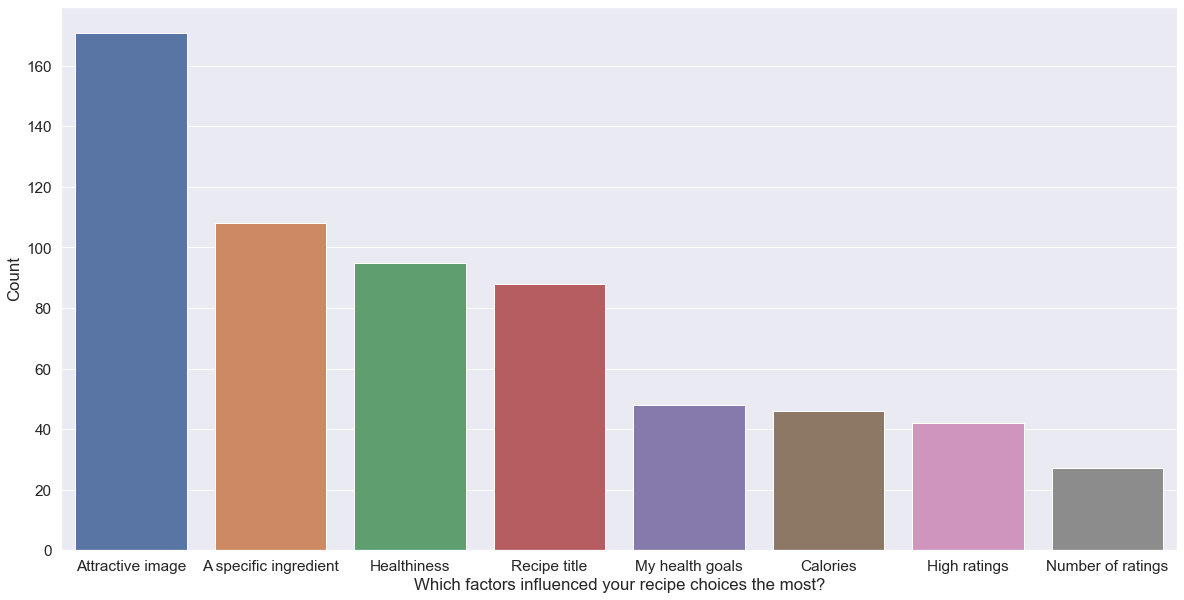

In [66]:
# MTL
ns = {'Which factors influenced your recipe choices the most?':["Attractive image","A specific ingredient","Healthiness","Recipe title","My health goals","Calories","High ratings","Number of ratings"], 'Count':[171,108,95,88,48,46,42,27]}
ns = pd.DataFrame(data=ns)
#ns["Count"].plot(kind="bar")
sns.barplot(data=ns, x='Which factors influenced your recipe choices the most?', y="Count")
plt.savefig('mtl_endq3.png')

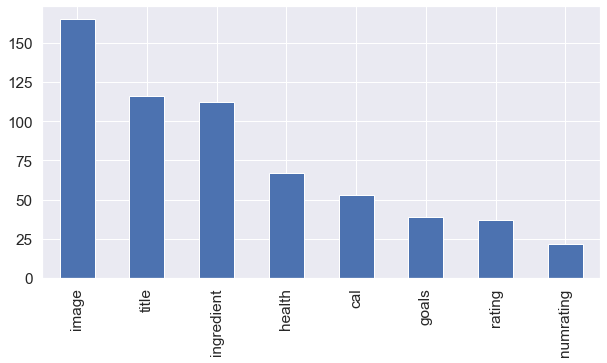

In [43]:
# No-label
sns.set(font_scale=1.4)
plt.figure(figsize=(10,5))
e3['label_q3'].str.split(",",expand=True).stack().value_counts().nlargest(8).plot(kind='bar')
plt.savefig('no_endq3.png')


In [67]:
e3['label_q3'].str.split(",",expand=True).stack().value_counts().nlargest(8)

image         165
title         116
ingredient    112
health         67
cal            53
goals          39
rating         37
numrating      22
dtype: int64

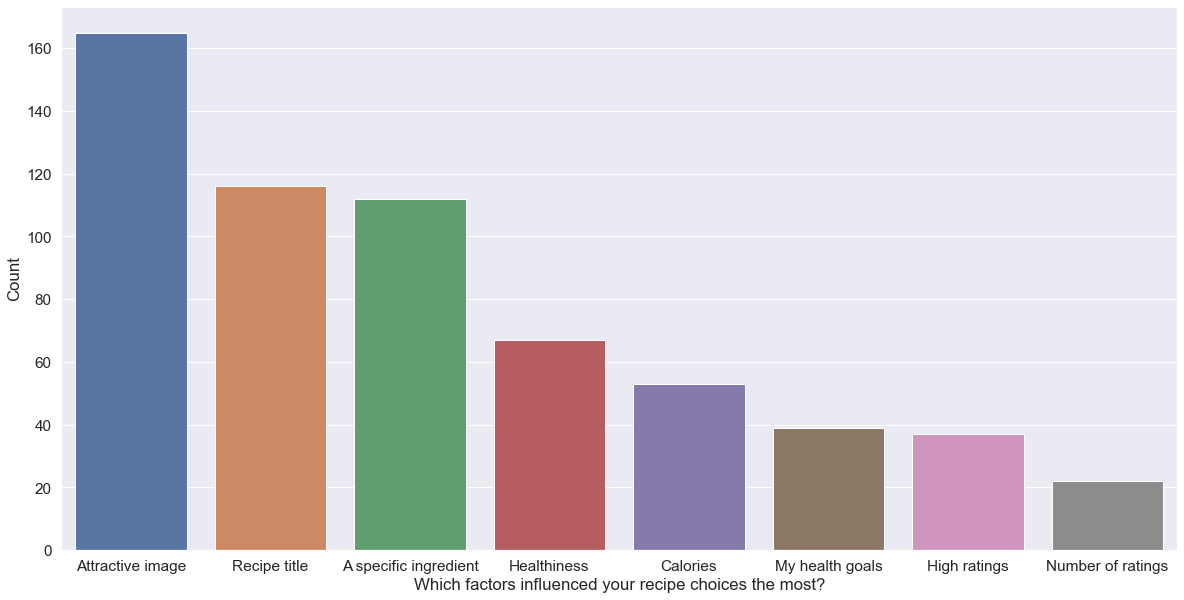

In [68]:
# NO LABEL
ns = {'Which factors influenced your recipe choices the most?':["Attractive image","Recipe title","A specific ingredient","Healthiness","Calories","My health goals","High ratings","Number of ratings"], 'Count':[165,116,112,67,53,39,37,22]}
ns = pd.DataFrame(data=ns)
#ns["Count"].plot(kind="bar")
sns.barplot(data=ns, x='Which factors influenced your recipe choices the most?', y="Count")
plt.savefig('no_endq3.png')

# Two-way ANOVA
To examine RQ1, a two-way repeated measures ANOVA was conducted to compare the influence of labels and health re-ranking on the healthiness of recipes chosen across three different trials.

In [784]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA

# Condition = Label
# Variant = Ranking
model = ols('fsa_score ~ C(condition) + C(variant) + C(condition):C(variant)', data=ms).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(condition),31.515676,2.0,8.436106,0.000224
C(variant),5.801339,2.0,1.552900,0.211874
C(condition):C(variant),1.693526,4.0,0.226661,0.923572
Residual,3958.089062,2119.0,NaN,NaN


* Since the p-values for label is less than .05, this means that label have a statistically significant effect on FSA score. The p-value for ranking is greater than .05, and ranking does not have a statistically significant effect on FSA score. 

* And since the p-value for the interaction effect (.923572) is not less than .05, this tells us that there is no significant interaction effect between label and ranking. 

# Repeated Measure ANOVA

In [834]:
# Get data
anova_df = ms[['fsa_score', 'variant', 'condition', 'user_id']]
anova_df

# Create a new column with names for each label
def label_name (row):
    if row['condition'] == 1 :
        return 'Nutriscore'
    if row['condition'] == 2 :
        return 'MTL'
    if row['condition'] == 3 :
        return 'No-label'

def rank_name (row):
    if row['variant'] == 1 :
        return 'Popular'
    if row['variant'] == 2 :
        return 'Random'
    if row['variant'] == 3 :
        return 'Health'

anova_df['Label'] = anova_df.apply (lambda row: label_name(row), axis=1)
anova_df['Rank'] = anova_df.apply (lambda row: rank_name(row), axis=1)

In [863]:
# Do RM ANOVA for each condition 
pg.rm_anova(data=anova_df, dv='fsa_score', within='Rank', subject='user_id', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Rank,5.832846,2,2.916423,1.630498,0.196197,0.002285,0.997709
1,Error,2547.065686,1424,1.788670,NaN,NaN,NaN,NaN


## Post-hoc tests corrected for multiple-comparisons

In [859]:
# Balance data 
g = anova_df[anova_df['user_id'].map(anova_df['user_id'].value_counts()) > 2]

# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=g, dv='fsa_score', within='Rank', subject='user_id',
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast    A        B        Paired    Parametric        T      dof  Tail         p-unc    p-corr  p-adjust      BF10    hedges
----------  -------  -------  --------  ------------  -----  -------  ---------  -------  --------  ----------  ------  --------
Rank        Health   Popular  True      True          1.397  691.000  two-sided    0.163     0.244  fdr_bh       0.113     0.074
Rank        Health   Random   True      True          1.616  691.000  two-sided    0.107     0.244  fdr_bh       0.157     0.085
Rank        Popular  Random   True      True          0.174  691.000  two-sided    0.862     0.862  fdr_bh       0.043     0.010



In [866]:
df = pg.read_dataset('rm_anova')
df

,Subject,Gender,Region,Education,DesireToKill,Disgustingness,Frighteningness
0,1,Female,North,some,10.0,High,High
1,1,Female,North,some,9.0,High,Low
2,1,Female,North,some,6.0,Low,High
3,1,Female,North,some,6.0,Low,Low
4,2,Female,North,advance,10.0,High,High
5,2,Female,North,advance,10.0,High,Low
6,2,Female,North,advance,NaN,Low,High
7,2,Female,North,advance,10.0,Low,Low
8,3,Female,Europe,college,10.0,High,High
9,3,Female,Europe,college,10.0,High,Low
